# Predicting Trip Duration for the `New York City Taxi Trip Duration` Dataset


## Introduction

Greetings, This is my ML project to predict the duration of an taxi ride in NYC based upon the `New York City Taxi Trip Duration` dataset on Kaggle. In the dataset, various features are given about a typical taxi ride in New York City or NYC.In this notebook, I will be doing things like Data Wrangling, Data Cleaning, Feature Engineering, Exploratory Data Analysis and Modeling. In the end, I will use the trained model to predict on the test dataset to get the final results and publish to the Kaggle Competiton.

There will be 2 models, a simple Decision Tree using the Scikit Learn Library and the other will be an Gradient Boosted Machine and the library that I will be using is XGBoost.I will also be tuning the Hyperparameters of these models to get the best predictions possible.


## Summary

The `New York City Taxi Trip Duration` was a competition held by Kaggle about 5yrs ago. The main goal of this competition was to predict the trip duration of a taxi ride in NYC based upon certain features that is common for each ride .There are various notebooks out there for this problem, some from which I have also taken inspiration.I am going to be trying to solve this while alsO describing my thought process and explaining which method and why I will be using them.

So without further delays, lets dive in !

Let us download or upgrade the necessary packages.

In [1]:
!pip install numpy pandas matplotlib seaborn --quiet


In [2]:
!pip install scikit-learn xgboost opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]

## Loading the data

In [4]:
od.download("https://www.kaggle.com/competitions/nyc-taxi-trip-duration/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  argha2000


Your Kaggle Key:

  ································


100%|██████████| 85.8M/85.8M [00:00<00:00, 144MB/s] 



Extracting archive ./nyc-taxi-trip-duration/nyc-taxi-trip-duration.zip to ./nyc-taxi-trip-duration


In [5]:
train_df = pd.read_csv("/kaggle/working/nyc-taxi-trip-duration/train.zip",compression = "zip")

In [6]:
test_df =pd.read_csv("/kaggle/working/nyc-taxi-trip-duration/test.zip",compression = "zip")

In [7]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [8]:
test_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [9]:
submission_df = pd.read_csv("/kaggle/working/nyc-taxi-trip-duration/sample_submission.zip",compression = "zip")

In [10]:
submission_df


,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


## Feature Engineering and Data Cleaning


We will first modiy the `pickup_datatime` column to create new columns that are homogenous in nature. We will extract the year, day of month, month and week of the year information.  While the others are self explanatory,  **week of the year** adn **day of the week** is being extracted to train the model in such a way so that it can gather some intuition that maybe the holidays will have busy traffic, and so these week and day pair may have larger than usaul trip time, etc. These intuitions are very important to create a good model.

In [11]:
# Helper function for splitting datetime into homogenous columns

def split_date_time(df,datetime_column = "pickup_datetime"):
  df[datetime_column] = pd.to_datetime(df[datetime_column])
  df["date"] = df[datetime_column].dt.date
  df["day"] = df[datetime_column].dt.day 
  df["month"] = df[datetime_column].dt.month 
  df["year"] = df[datetime_column].dt.year 
  df["hour"] = df[datetime_column].dt.hour
  df["minute"] = df[datetime_column].dt.minute
  df["second"] = df[datetime_column].dt.second
  df['WeekOfYear'] = df[datetime_column].dt.isocalendar().week
  df["DayOfWeek"] = df[datetime_column].dt.isocalendar().day

  return df

In [12]:
train_df = split_date_time(train_df)
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,day,month,year,hour,minute,second,WeekOfYear,DayOfWeek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,3,2016,17,24,55,11,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,6,2016,0,43,35,23,7
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,1,2016,11,35,24,3,2
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,4,2016,19,32,31,14,3
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,3,2016,13,30,55,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,8,4,2016,13,31,4,14,5
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,10,1,2016,7,35,15,1,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,22,4,2016,6,57,41,16,5
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,5,1,2016,15,56,26,1,2


In [13]:
test_df = split_date_time(test_df)
test_df 

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,date,day,month,year,hour,minute,second,WeekOfYear,DayOfWeek
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016-06-30,30,6,2016,23,59,58,26,4
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016-06-30,30,6,2016,23,59,53,26,4
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016-06-30,30,6,2016,23,59,47,26,4
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016-06-30,30,6,2016,23,59,41,26,4
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016-06-30,30,6,2016,23,59,33,26,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,2016-01-01,1,1,2016,0,2,52,53,5
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,2016-01-01,1,1,2016,0,1,52,53,5
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,2016-01-01,1,1,2016,0,1,24,53,5
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,2016-01-01,1,1,2016,0,0,28,53,5


Next, let us look at some of the descriptive statistics of our dataset.

In [14]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day,month,year,hour,minute,second,WeekOfYear,DayOfWeek
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,1.550402e+01,3.516818e+00,2016.0,1.360648e+01,2.959016e+01,2.947359e+01,1.383993e+01,4.050375e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,8.703135e+00,1.681038e+00,0.0,6.399693e+00,1.732471e+01,1.731985e+01,8.564756e+00,1.954039e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,1.000000e+00,1.000000e+00,2016.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,8.000000e+00,2.000000e+00,2016.0,9.000000e+00,1.500000e+01,1.400000e+01,7.000000e+00,2.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,1.500000e+01,4.000000e+00,2016.0,1.400000e+01,3.000000e+01,2.900000e+01,1.300000e+01,4.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,2.300000e+01,5.000000e+00,2016.0,1.900000e+01,4.500000e+01,4.400000e+01,2.000000e+01,6.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,3.100000e+01,6.000000e+00,2016.0,2.300000e+01,5.900000e+01,5.900000e+01,5.300000e+01,7.000000e+00


Seems that the max value in `trip_duration` is  3,500,000 seconds(about 970 hrs). This can only be due to an outlier. Ideally, the trip duration should be about greater than 30 secs e and less than 5 hrs. Normally, we will treat for such outliers, but since the metric of determination is RMSLE, we avoid doing so as it is less prone to the effect of outliers. . 


Let's see if there are trips where the passenger count was 0.


In [20]:
train_df[train_df["passenger_count"] == 0]["passenger_count"].count()

60

only 17 values are like this, so we can likely drop them.

In [21]:
train_df.drop(train_df[train_df["passenger_count"] == 0].index, inplace = True)

In [22]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,day,month,year,hour,minute,second,WeekOfYear,DayOfWeek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,3,2016,17,24,55,11,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,6,2016,0,43,35,23,7
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,1,2016,11,35,24,3,2
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,4,2016,19,32,31,14,3
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,3,2016,13,30,55,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,8,4,2016,13,31,4,14,5
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,10,1,2016,7,35,15,1,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,22,4,2016,6,57,41,16,5
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,5,1,2016,15,56,26,1,2


Now, according to the dataset description page, it seems the Dataset is based on 2016, so what we can do is download the holiday list csv of 2016 for NYC and then merge it with these 2 ,train and test dataset.

In [23]:
od.download("https://www.kaggle.com/datasets/pceccon/nyc2016holidays")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  argha2000


Your Kaggle Key:

  ································


100%|██████████| 464/464 [00:00<00:00, 830kB/s]

In [24]:
holidays_df = pd.read_csv("/kaggle/working/nyc2016holidays/NYC_2016Holidays.csv")

In [25]:
holidays_df

,Day;Date;Holiday
0,Friday;January 01;New Years Day
1,Monday;January 18;Martin Luther King Jr. Day
2,Friday;February 12;Lincoln's Birthday
3,Monday;February 15;Presidents' Day
4,Sunday;May 08;Mother's Day
5,Monday;May 30;Memorial Day
6,Sunday;June 19;Father's Day
7,Monday;July 04;Independence Day
8,Monday;September 05;Labor Day
9,Monday;October 10;Columbus Day


In [26]:
temp = holidays_df["Day;Date;Holiday"].str.split(";",expand = True)

In [27]:
holidays_df["DayOfWeek"] = temp[0]
holidays_df["Holiday"] = temp[2]


In [28]:
holidays_df

,Day;Date;Holiday,DayOfWeek,Holiday
0,Friday;January 01;New Years Day,Friday,New Years Day
1,Monday;January 18;Martin Luther King Jr. Day,Monday,Martin Luther King Jr. Day
2,Friday;February 12;Lincoln's Birthday,Friday,Lincoln's Birthday
3,Monday;February 15;Presidents' Day,Monday,Presidents' Day
4,Sunday;May 08;Mother's Day,Sunday,Mother's Day
5,Monday;May 30;Memorial Day,Monday,Memorial Day
6,Sunday;June 19;Father's Day,Sunday,Father's Day
7,Monday;July 04;Independence Day,Monday,Independence Day
8,Monday;September 05;Labor Day,Monday,Labor Day
9,Monday;October 10;Columbus Day,Monday,Columbus Day


In [29]:
other_temp = temp[1].str.split(" ",expand = True)

In [30]:
other_temp

,0,1
0,January,01
1,January,18
2,February,12
3,February,15
4,May,08
5,May,30
6,June,19
7,July,04
8,September,05
9,October,10


In [31]:
holidays_df[["month","day"]] = other_temp[[0,1]]

In [32]:
holidays_df

,Day;Date;Holiday,DayOfWeek,Holiday,month,day
0,Friday;January 01;New Years Day,Friday,New Years Day,January,01
1,Monday;January 18;Martin Luther King Jr. Day,Monday,Martin Luther King Jr. Day,January,18
2,Friday;February 12;Lincoln's Birthday,Friday,Lincoln's Birthday,February,12
3,Monday;February 15;Presidents' Day,Monday,Presidents' Day,February,15
4,Sunday;May 08;Mother's Day,Sunday,Mother's Day,May,08
5,Monday;May 30;Memorial Day,Monday,Memorial Day,May,30
6,Sunday;June 19;Father's Day,Sunday,Father's Day,June,19
7,Monday;July 04;Independence Day,Monday,Independence Day,July,04
8,Monday;September 05;Labor Day,Monday,Labor Day,September,05
9,Monday;October 10;Columbus Day,Monday,Columbus Day,October,10


In [33]:
mapped_month = {"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12
                }

In [34]:
holidays_df.month = holidays_df.month.map(mapped_month)

In [35]:
holidays_df

,Day;Date;Holiday,DayOfWeek,Holiday,month,day
0,Friday;January 01;New Years Day,Friday,New Years Day,1,01
1,Monday;January 18;Martin Luther King Jr. Day,Monday,Martin Luther King Jr. Day,1,18
2,Friday;February 12;Lincoln's Birthday,Friday,Lincoln's Birthday,2,12
3,Monday;February 15;Presidents' Day,Monday,Presidents' Day,2,15
4,Sunday;May 08;Mother's Day,Sunday,Mother's Day,5,08
5,Monday;May 30;Memorial Day,Monday,Memorial Day,5,30
6,Sunday;June 19;Father's Day,Sunday,Father's Day,6,19
7,Monday;July 04;Independence Day,Monday,Independence Day,7,04
8,Monday;September 05;Labor Day,Monday,Labor Day,9,05
9,Monday;October 10;Columbus Day,Monday,Columbus Day,10,10


In [36]:
holidays_df["day"] = pd.Series([1,18,12,15,8,30,19,4,5,10,11,24,26,4,8])

In [37]:
holidays_df

,Day;Date;Holiday,DayOfWeek,Holiday,month,day
0,Friday;January 01;New Years Day,Friday,New Years Day,1,1
1,Monday;January 18;Martin Luther King Jr. Day,Monday,Martin Luther King Jr. Day,1,18
2,Friday;February 12;Lincoln's Birthday,Friday,Lincoln's Birthday,2,12
3,Monday;February 15;Presidents' Day,Monday,Presidents' Day,2,15
4,Sunday;May 08;Mother's Day,Sunday,Mother's Day,5,8
5,Monday;May 30;Memorial Day,Monday,Memorial Day,5,30
6,Sunday;June 19;Father's Day,Sunday,Father's Day,6,19
7,Monday;July 04;Independence Day,Monday,Independence Day,7,4
8,Monday;September 05;Labor Day,Monday,Labor Day,9,5
9,Monday;October 10;Columbus Day,Monday,Columbus Day,10,10


In [38]:
holidays_df.DayOfWeek = holidays_df.DayOfWeek.map({"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}) 

In [39]:
holidays_df.drop("Day;Date;Holiday",axis = 1,inplace = True)
holidays_df


,DayOfWeek,Holiday,month,day
0,5,New Years Day,1,1
1,1,Martin Luther King Jr. Day,1,18
2,5,Lincoln's Birthday,2,12
3,1,Presidents' Day,2,15
4,7,Mother's Day,5,8
5,1,Memorial Day,5,30
6,7,Father's Day,6,19
7,1,Independence Day,7,4
8,1,Labor Day,9,5
9,1,Columbus Day,10,10


In [40]:
# Now let us get the merged df. The merge/join will be based on 3 columns

merged_train_df = pd.merge(train_df,holidays_df,how = "left",left_on = ["month","day","DayOfWeek"], right_on =["month","day","DayOfWeek"] )

In [41]:
merged_train_df.sample(20,random_state=57)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date,day,month,year,hour,minute,second,WeekOfYear,DayOfWeek,Holiday
1394479,id2717546,1,2016-04-25 19:31:39,2016-04-25 19:55:02,1,-73.987907,40.749580,-73.917236,40.867924,N,...,2016-04-25,25,4,2016,19,31,39,17,1,NaN
890814,id3180727,1,2016-06-01 08:32:05,2016-06-01 08:39:58,2,-73.976143,40.752335,-73.988319,40.737522,N,...,2016-06-01,1,6,2016,8,32,5,22,3,NaN
445510,id2734726,2,2016-04-11 02:23:29,2016-04-11 02:30:21,1,-73.980309,40.765961,-73.956596,40.780708,N,...,2016-04-11,11,4,2016,2,23,29,15,1,NaN
309103,id2105770,2,2016-02-28 22:32:04,2016-02-28 22:43:44,1,-73.987129,40.718380,-73.980301,40.748379,N,...,2016-02-28,28,2,2016,22,32,4,8,7,NaN
1011706,id0444967,1,2016-04-28 00:22:41,2016-04-28 00:29:40,1,-73.993958,40.735256,-73.979988,40.732559,N,...,2016-04-28,28,4,2016,0,22,41,17,4,NaN
725390,id3407223,1,2016-02-10 12:35:13,2016-02-10 12:43:59,1,-73.970795,40.793091,-73.955757,40.779362,N,...,2016-02-10,10,2,2016,12,35,13,6,3,NaN
1230743,id0811785,1,2016-05-17 09:13:28,2016-05-17 09:27:11,1,-73.999039,40.744598,-73.993790,40.762054,N,...,2016-05-17,17,5,2016,9,13,28,20,2,NaN
938658,id1563554,1,2016-04-08 23:24:44,2016-04-08 23:49:01,2,-73.987694,40.667416,-73.929955,40.694824,N,...,2016-04-08,8,4,2016,23,24,44,14,5,NaN
21634,id1435595,2,2016-05-17 23:41:23,2016-05-17 23:53:06,2,-73.981880,40.752411,-73.952843,40.783371,N,...,2016-05-17,17,5,2016,23,41,23,20,2,NaN
1361375,id1086971,1,2016-04-18 00:25:13,2016-04-18 00:33:24,2,-73.984383,40.745960,-73.990021,40.767296,N,...,2016-04-18,18,4,2016,0,25,13,16,1,NaN


We then convert the `Holiday` column in binary form.

In [42]:
def replace_nan(df):
  # this function replaces nan values in Holiday Column with 0 and others with 1
  new_series= df["Holiday"].notnull().astype("int")
  return new_series

In [43]:
merged_train_df["Holiday"] = replace_nan(merged_train_df) 

In [44]:
merged_train_df.sample(20,random_state = 57)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date,day,month,year,hour,minute,second,WeekOfYear,DayOfWeek,Holiday
1394479,id2717546,1,2016-04-25 19:31:39,2016-04-25 19:55:02,1,-73.987907,40.749580,-73.917236,40.867924,N,...,2016-04-25,25,4,2016,19,31,39,17,1,0
890814,id3180727,1,2016-06-01 08:32:05,2016-06-01 08:39:58,2,-73.976143,40.752335,-73.988319,40.737522,N,...,2016-06-01,1,6,2016,8,32,5,22,3,0
445510,id2734726,2,2016-04-11 02:23:29,2016-04-11 02:30:21,1,-73.980309,40.765961,-73.956596,40.780708,N,...,2016-04-11,11,4,2016,2,23,29,15,1,0
309103,id2105770,2,2016-02-28 22:32:04,2016-02-28 22:43:44,1,-73.987129,40.718380,-73.980301,40.748379,N,...,2016-02-28,28,2,2016,22,32,4,8,7,0
1011706,id0444967,1,2016-04-28 00:22:41,2016-04-28 00:29:40,1,-73.993958,40.735256,-73.979988,40.732559,N,...,2016-04-28,28,4,2016,0,22,41,17,4,0
725390,id3407223,1,2016-02-10 12:35:13,2016-02-10 12:43:59,1,-73.970795,40.793091,-73.955757,40.779362,N,...,2016-02-10,10,2,2016,12,35,13,6,3,0
1230743,id0811785,1,2016-05-17 09:13:28,2016-05-17 09:27:11,1,-73.999039,40.744598,-73.993790,40.762054,N,...,2016-05-17,17,5,2016,9,13,28,20,2,0
938658,id1563554,1,2016-04-08 23:24:44,2016-04-08 23:49:01,2,-73.987694,40.667416,-73.929955,40.694824,N,...,2016-04-08,8,4,2016,23,24,44,14,5,0
21634,id1435595,2,2016-05-17 23:41:23,2016-05-17 23:53:06,2,-73.981880,40.752411,-73.952843,40.783371,N,...,2016-05-17,17,5,2016,23,41,23,20,2,0
1361375,id1086971,1,2016-04-18 00:25:13,2016-04-18 00:33:24,2,-73.984383,40.745960,-73.990021,40.767296,N,...,2016-04-18,18,4,2016,0,25,13,16,1,0


In [45]:
#We repeat the same for the test set

merged_test_df = pd.merge(test_df,holidays_df,how = "left",left_on = ["month","day","DayOfWeek"], right_on =["month","day","DayOfWeek"] )

In [46]:
merged_test_df.sample(20,random_state = 56)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,date,day,month,year,hour,minute,second,WeekOfYear,DayOfWeek,Holiday
582861,id3541248,1,2016-01-14 10:36:37,1,-73.982185,40.762581,-73.972626,40.757809,N,2016-01-14,14,1,2016,10,36,37,2,4,NaN
179840,id2436983,1,2016-05-08 16:53:03,1,-73.993141,40.751858,-73.790466,40.646732,N,2016-05-08,8,5,2016,16,53,3,18,7,Mother's Day
378531,id3148413,2,2016-03-13 20:01:43,2,-73.985954,40.731003,-74.002945,40.731041,N,2016-03-13,13,3,2016,20,1,43,10,7,NaN
417105,id3105973,1,2016-03-03 10:28:10,2,-73.965378,40.759274,-73.959396,40.759975,N,2016-03-03,3,3,2016,10,28,10,9,4,NaN
168328,id0562044,1,2016-05-12 06:54:39,2,-73.789803,40.646938,-73.963264,40.716705,N,2016-05-12,12,5,2016,6,54,39,19,4,NaN
164316,id1651732,1,2016-05-13 08:11:48,1,-73.986374,40.777397,-73.980980,40.762283,N,2016-05-13,13,5,2016,8,11,48,19,5,NaN
582064,id2837823,1,2016-01-14 15:12:05,1,-73.960548,40.775578,-73.967766,40.766026,N,2016-01-14,14,1,2016,15,12,5,2,4,NaN
179254,id3537591,2,2016-05-08 20:06:47,5,-74.001350,40.756889,-74.001259,40.734032,N,2016-05-08,8,5,2016,20,6,47,18,7,Mother's Day
532068,id2570709,1,2016-01-30 17:56:09,1,-73.981178,40.781902,-73.945282,40.780136,N,2016-01-30,30,1,2016,17,56,9,4,6,NaN
19261,id3698965,1,2016-06-24 23:44:09,2,-73.991371,40.749939,-73.995743,40.764332,N,2016-06-24,24,6,2016,23,44,9,25,5,NaN


In [47]:
merged_test_df["Holiday"] = replace_nan(merged_test_df)


In [48]:
merged_test_df.sample(20,random_state = 56)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,date,day,month,year,hour,minute,second,WeekOfYear,DayOfWeek,Holiday
582861,id3541248,1,2016-01-14 10:36:37,1,-73.982185,40.762581,-73.972626,40.757809,N,2016-01-14,14,1,2016,10,36,37,2,4,0
179840,id2436983,1,2016-05-08 16:53:03,1,-73.993141,40.751858,-73.790466,40.646732,N,2016-05-08,8,5,2016,16,53,3,18,7,1
378531,id3148413,2,2016-03-13 20:01:43,2,-73.985954,40.731003,-74.002945,40.731041,N,2016-03-13,13,3,2016,20,1,43,10,7,0
417105,id3105973,1,2016-03-03 10:28:10,2,-73.965378,40.759274,-73.959396,40.759975,N,2016-03-03,3,3,2016,10,28,10,9,4,0
168328,id0562044,1,2016-05-12 06:54:39,2,-73.789803,40.646938,-73.963264,40.716705,N,2016-05-12,12,5,2016,6,54,39,19,4,0
164316,id1651732,1,2016-05-13 08:11:48,1,-73.986374,40.777397,-73.980980,40.762283,N,2016-05-13,13,5,2016,8,11,48,19,5,0
582064,id2837823,1,2016-01-14 15:12:05,1,-73.960548,40.775578,-73.967766,40.766026,N,2016-01-14,14,1,2016,15,12,5,2,4,0
179254,id3537591,2,2016-05-08 20:06:47,5,-74.001350,40.756889,-74.001259,40.734032,N,2016-05-08,8,5,2016,20,6,47,18,7,1
532068,id2570709,1,2016-01-30 17:56:09,1,-73.981178,40.781902,-73.945282,40.780136,N,2016-01-30,30,1,2016,17,56,9,4,6,0
19261,id3698965,1,2016-06-24 23:44:09,2,-73.991371,40.749939,-73.995743,40.764332,N,2016-06-24,24,6,2016,23,44,9,25,5,0


What we can also do is create a feature that tells whether a day is a weekday or weekend.

In [49]:
merged_train_df["weekday"] = merged_train_df["DayOfWeek"].map( lambda x: 1 if x in [1,2,3,4,5] else 0)

In [50]:
merged_test_df["weekday"] = merged_test_df["DayOfWeek"].map( lambda x: 1 if x in [1,2,3,4,5] else 0)

In [51]:
len(merged_train_df.columns),len(merged_test_df.columns)

(22, 20)

Okay, this looks good so far.Another thing that  we can also do is to create a column that calculates the distance between 2 points based upon the longitude and latitude of those said 2 places. To do so, I will be using this brilliant function that I found on [stackoverflow](https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836). This uses a concept called Haversine Distance. After calculating the distance, it returns the value in **kilometers** which we then convert to **meters**. To learn more, I am also linking the [wikipedia page](https://en.wikipedia.org/wiki/Haversine_formula) about it. Also, with Haversine distance we can also calculate the Mnahatten distance as stated [here](https://stackoverflow.com/questions/32923363/manhattan-distance-for-two-geolocations).

We also calculate the bearing direction,i.e, the direction where the vehicle is heading towards based upon the answer I got on this [thread](https://stackoverflow.com/questions/65512622/calculate-harvesine-and-initial-bearing-for-successive-points-of-a-panda-datafra)

In [52]:
def haversine_dist(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    Returns distance calculated in km's.
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c # changed only this value for a more accurate one
    return km

def get_compass_bearing(lon1,lat1,lon2,lat2):
  
    lon1,lat1,lon2,lat2 =  map(np.radians, [lon1, lat1, lon2, lat2])
    diffLong = (lon2 - lon1)

    x = np.sin(diffLong) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1)
            * np.cos(lat2) * np.cos(diffLong))

    initial_bearing = np.arctan2(x, y)

    # Now we have the initial bearing but math.atan2 return values
    # from -180° to + 180° which is not what we want for a compass bearing
    # The solution is to normalize the initial bearing as shown below
    initial_bearing = np.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360
    
    return compass_bearing

def manhatten_dist(lon1, lat1, lon2, lat2):
    a = haversine_dist(lat1, lon1, lat1, lon2)
    b = haversine_dist(lat1, lon1, lat2, lon1)
    return a + b


In [53]:
merged_train_df["haversine_distance"] = haversine_dist(merged_train_df["pickup_longitude"],merged_train_df["pickup_latitude"],
                                             merged_train_df["dropoff_longitude"], merged_train_df["dropoff_latitude"])*1000 # calculate distance in meters

merged_train_df["manhatten_distance"] = manhatten_dist(merged_train_df["pickup_longitude"],merged_train_df["pickup_latitude"],
                                             merged_train_df["dropoff_longitude"], merged_train_df["dropoff_latitude"])*1000 # calculate distance in meters

merged_train_df["bearing"] = get_compass_bearing(merged_train_df["pickup_longitude"],merged_train_df["pickup_latitude"],
                                             merged_train_df["dropoff_longitude"], merged_train_df["dropoff_latitude"])

In [54]:
# repeat the same for the test dataset

merged_test_df["haversine_distance"] = haversine_dist(merged_test_df["pickup_longitude"],merged_test_df["pickup_latitude"],
                                             merged_test_df["dropoff_longitude"], merged_test_df["dropoff_latitude"]) * 1000 # calculate distance in meters

merged_test_df["manhatten_distance"] = manhatten_dist(merged_test_df["pickup_longitude"],merged_test_df["pickup_latitude"],
                                             merged_test_df["dropoff_longitude"], merged_test_df["dropoff_latitude"])*1000 

merged_test_df["bearing"] = get_compass_bearing(merged_test_df["pickup_longitude"],merged_test_df["pickup_latitude"],
                                             merged_test_df["dropoff_longitude"], merged_test_df["dropoff_latitude"])

Now,there might be some values of manhatten_distance greater than ,say 200km which are clearly anomalous in nature.

In [55]:
merged_train_df[merged_train_df["manhatten_distance"] > 200*1000 ]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,hour,minute,second,WeekOfYear,DayOfWeek,Holiday,weekday,haversine_distance,manhatten_distance,bearing
114375,id1311087,1,2016-02-29 12:16:29,2016-02-29 18:47:09,3,-75.455917,39.803932,-73.796021,40.707726,N,...,12,16,29,9,1,0,1,1.730294e+05,2.098092e+05,53.959548
184923,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,...,18,58,53,18,6,0,0,1.240909e+06,4.961983e+05,184.613757
275639,id0978162,1,2016-02-24 16:20:59,2016-02-24 16:35:34,4,-75.354332,34.712234,-73.834923,32.181141,N,...,16,20,59,8,3,0,1,3.147642e+05,2.401058e+05,152.972227
377058,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,...,20,33,19,13,6,0,0,3.201258e+05,3.829657e+05,232.993912
397515,id0982904,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.870682,40.773598,-79.817978,38.963852,N,...,13,32,14,17,4,0,1,5.458535e+05,7.172112e+05,250.299020
910042,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,N,...,18,57,32,7,1,1,1,5.788428e+05,5.388145e+05,145.679904
923759,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.972366,40.758633,-79.553535,43.674000,N,...,21,2,32,8,3,0,1,5.622352e+05,7.100935e+05,307.047728
974342,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,...,20,40,52,1,3,0,1,8.912141e+05,1.025761e+06,314.149763
1013437,id3626673,1,2016-05-05 18:02:50,2016-05-05 18:18:23,1,-73.978912,40.756763,-79.338699,41.427902,N,...,18,2,50,18,4,0,1,4.552412e+05,6.165775e+05,281.188764
1060767,id0838705,1,2016-02-26 19:50:03,2016-02-26 20:08:54,1,-66.972160,44.371944,-69.048019,43.147583,N,...,19,50,3,8,5,0,1,2.152266e+05,2.840802e+05,231.485370


Let us drop such rows.

In [56]:
merge_train_df = merged_train_df[~(merged_train_df["manhatten_distance"] > 200*1000)]


In [57]:
merged_train_df.isna().sum()


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
date                  0
day                   0
month                 0
year                  0
hour                  0
minute                0
second                0
WeekOfYear            0
DayOfWeek             0
Holiday               0
weekday               0
haversine_distance    0
manhatten_distance    0
bearing               0
dtype: int64

In [58]:
merged_test_df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
date                  0
day                   0
month                 0
year                  0
hour                  0
minute                0
second                0
WeekOfYear            0
DayOfWeek             0
Holiday               0
weekday               0
haversine_distance    0
manhatten_distance    0
bearing               0
dtype: int64

In [59]:
merged_train_df.month.unique()

array([3, 6, 1, 4, 5, 2])

We can see that the data is mostly for the period of January to June.

In [60]:
merged_test_df.month.unique() # Seems to be the same for the test set

array([6, 5, 4, 3, 2, 1])

We do know that weather plays a part to determine trip  duration. Let us get a dataset that allows us to do this. This dataset gives us the daily temperature, precipitation, and other parameters that will help the model learn the relationship between weather and trip duration.

In [66]:
def return_merged_df(df1,df2,cols_to_merge_on = [],type_of_join = "inner"):
  """
  This function merges 2 dataframes without duplicacy of columns
  
  It is a modified and combined version of the one that I found on stackoverflow and 
  
  was given by user @rprog :https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns
  
  and one in this noteboook:https://www.kaggle.com/code/yohanb/fe-lightgbm-local-cv-0-37-0-002
"""

        
  dfNew = pd.merge(left=df1, right=df2.drop_duplicates(subset=cols_to_merge_on), 
                  on=cols_to_merge_on, how=type_of_join) 

  
  dfNew.drop(dfNew.filter(regex='_y$').columns, axis=1, inplace=True)
  return dfNew


In [78]:
od.download("https://www.kaggle.com/datasets/meinertsen/new-york-city-taxi-trip-hourly-weather-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  argha2000


Your Kaggle Key:

  ································


100%|██████████| 178k/178k [00:00<00:00, 65.4MB/s]

In [79]:
weather_df = pd.read_csv("/kaggle/working/new-york-city-taxi-trip-hourly-weather-data/Weather.csv")

In [80]:
weather_df

,pickup_datetime,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,...,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.5,0.02,Light Rain,rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,46.0,6.1,43.0,89.0,5.6,3.5,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
3,2015-12-31 01:51:00,7.2,45.0,5.6,42.1,90.0,7.4,4.6,NaN,NaN,...,0.3,0.01,Overcast,cloudy,0,0,0,0,0,0
4,2015-12-31 02:51:00,7.2,45.0,5.6,42.1,90.0,0.0,0.0,NaN,NaN,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,2016-12-31 19:51:00,6.1,43.0,-4.4,24.1,47.0,7.4,4.6,NaN,NaN,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10477,2016-12-31 20:51:00,6.1,43.0,-4.4,24.1,47.0,13.0,8.1,38.9,24.2,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10478,2016-12-31 21:51:00,6.1,43.0,-5.0,23.0,45.0,9.3,5.8,29.6,18.4,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10479,2016-12-31 22:51:00,6.7,44.1,-5.0,23.0,43.0,14.8,9.2,NaN,NaN,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0


In [81]:
# extract the date time and create additional columns
weather_df = split_date_time(weather_df)

In [82]:
weather_df.isnull().sum()

pickup_datetime       0
tempm                 5
tempi                 5
dewptm                5
dewpti                5
hum                   5
wspdm               737
wspdi               737
wgustm             8605
wgusti             8605
wdird                 0
wdire                 0
vism                245
visi                245
pressurem           239
pressurei           239
windchillm         7775
windchilli         7775
heatindexm         9644
heatindexi         9644
precipm            8775
precipi            8775
conds                 0
icon                  0
fog                   0
rain                  0
snow                  0
hail                  0
thunder               0
tornado               0
date                  0
day                   0
month                 0
year                  0
hour                  0
minute                0
second                0
WeekOfYear            0
DayOfWeek             0
dtype: int64

We can see that some features are having more than half missing values(since dataset has 10,481 rows of examples) and some that are redundant. So we will be better off dropping them

In [83]:
#drop some redundant features and features that are majorly consisting of missing values
weather_df.drop(["tempi","dewpti","wspdi","wgusti","visi",
                 "pressurei","windchilli","heatindexi",
                "precipi","pickup_datetime","windchillm",
                "heatindexm","precipm","wgustm"],axis = 1,inplace = True)

In [84]:
weather_df.isnull().sum()

tempm           5
dewptm          5
hum             5
wspdm         737
wdird           0
wdire           0
vism          245
pressurem     239
conds           0
icon            0
fog             0
rain            0
snow            0
hail            0
thunder         0
tornado         0
date            0
day             0
month           0
year            0
hour            0
minute          0
second          0
WeekOfYear      0
DayOfWeek       0
dtype: int64

We can try to fill these values later or right now. We opt to fill them now as after join they will be bothersome to deal with. We will fill them with the mean value.

In [85]:
weather_df["tempm"].fillna(value = weather_df["tempm"].mean(),inplace = True)
weather_df["dewptm"].fillna(value = weather_df["dewptm"].mean(),inplace = True)
weather_df["hum"].fillna(value = weather_df["hum"].mean(),inplace = True)
weather_df["wspdm"].fillna(value = weather_df["wspdm"].mean(),inplace = True)
weather_df["vism"].fillna(value = weather_df["vism"].mean(),inplace = True)
weather_df["pressurem"].fillna(value = weather_df["pressurem"].mean(),inplace = True)

In [86]:
weather_df.isnull().sum()

tempm         0
dewptm        0
hum           0
wspdm         0
wdird         0
wdire         0
vism          0
pressurem     0
conds         0
icon          0
fog           0
rain          0
snow          0
hail          0
thunder       0
tornado       0
date          0
day           0
month         0
year          0
hour          0
minute        0
second        0
WeekOfYear    0
DayOfWeek     0
dtype: int64

In [87]:
# now let us append this with the main dataset 
new_merged_train_df = return_merged_df(merged_train_df,weather_df,["date","hour"],type_of_join = "left")
new_merged_test_df = return_merged_df(merged_test_df,weather_df,["date","hour"],type_of_join = "left")

In [88]:
new_merged_train_df.isnull().sum()

id                        0
vendor_id                 0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
store_and_fwd_flag        0
trip_duration             0
date                      0
day_x                     0
month_x                   0
year_x                    0
hour                      0
minute_x                  0
second_x                  0
WeekOfYear_x              0
DayOfWeek_x               0
Holiday                   0
weekday                   0
haversine_distance        0
manhatten_distance        0
bearing                   0
tempm                 13940
dewptm                13940
hum                   13940
wspdm                 13940
wdird                 13940
wdire                 13940
vism                  13940
pressurem             13940
conds                 13940
icon                  13940
fog                 

In [89]:
new_merged_test_df.isnull().sum()

id                       0
vendor_id                0
pickup_datetime          0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
store_and_fwd_flag       0
date                     0
day_x                    0
month_x                  0
year_x                   0
hour                     0
minute_x                 0
second_x                 0
WeekOfYear_x             0
DayOfWeek_x              0
Holiday                  0
weekday                  0
haversine_distance       0
manhatten_distance       0
bearing                  0
tempm                 5908
dewptm                5908
hum                   5908
wspdm                 5908
wdird                 5908
wdire                 5908
vism                  5908
pressurem             5908
conds                 5908
icon                  5908
fog                   5908
rain                  5908
snow                  5908
hail                  5908
t

We can see that now there are some missing values being introduced in the dataset.We will handle them in the imputation step.

In [90]:

new_merged_train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'date', 'day_x', 'month_x', 'year_x', 'hour',
       'minute_x', 'second_x', 'WeekOfYear_x', 'DayOfWeek_x', 'Holiday',
       'weekday', 'haversine_distance', 'manhatten_distance', 'bearing',
       'tempm', 'dewptm', 'hum', 'wspdm', 'wdird', 'wdire', 'vism',
       'pressurem', 'conds', 'icon', 'fog', 'rain', 'snow', 'hail', 'thunder',
       'tornado'],
      dtype='object')

Notice that some columns have now an additional term "_x" in the feature name. The values and what the features represent is still the same so we need not worry about it. It's a byproduct of the join that we did earlier.

In [91]:
new_merged_test_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,date,...,vism,pressurem,conds,icon,fog,rain,snow,hail,thunder,tornado
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016-06-30,...,16.1,1016.3,Clear,clear,0.0,0.0,0.0,0.0,0.0,0.0
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016-06-30,...,16.1,1016.3,Clear,clear,0.0,0.0,0.0,0.0,0.0,0.0
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016-06-30,...,16.1,1016.3,Clear,clear,0.0,0.0,0.0,0.0,0.0,0.0
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016-06-30,...,16.1,1016.3,Clear,clear,0.0,0.0,0.0,0.0,0.0,0.0
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016-06-30,...,16.1,1016.3,Clear,clear,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,2016-01-01,...,16.1,1017.9,Overcast,cloudy,0.0,0.0,0.0,0.0,0.0,0.0
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,2016-01-01,...,16.1,1017.9,Overcast,cloudy,0.0,0.0,0.0,0.0,0.0,0.0
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,2016-01-01,...,16.1,1017.9,Overcast,cloudy,0.0,0.0,0.0,0.0,0.0,0.0
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,2016-01-01,...,16.1,1017.9,Overcast,cloudy,0.0,0.0,0.0,0.0,0.0,0.0


So, we have now gotten the data that we needed about the weather that will give us ample amount of information about the duration ofa taxi trip.

Now, we know that certain extreme weather conditions can sway the population to avail cabs. Because of that, let us use the tips provided in [here](https://www.kaggle.com/c/nyc-taxi-trip-duration/discussion/38591#216546) andd bring that information to our dataset.

In [92]:
 weather_event = ['20160110', '20160113', '20160117', '20160123',
                 '20160205', '20160208', '20160215', '20160216',
                 '20160224', '20160225', '20160314', '20160315',
                 '20160328', '20160329', '20160403', '20160404',
                 '20160530', '20160628']
weather_event = pd.Series(pd.to_datetime(weather_event, format = '%Y%m%d')).dt.date

all_data = [new_merged_train_df,new_merged_test_df]
for df in all_data:
    df['extreme_weather'] = df.pickup_datetime.isin(weather_event).map({True: 1, False: 0})

In [93]:
new_merged_train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pressurem,conds,icon,fog,rain,snow,hail,thunder,tornado,extreme_weather
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1015.9,Overcast,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1019.3,Clear,clear,0.0,0.0,0.0,0.0,0.0,0.0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1015.5,Clear,clear,0.0,0.0,0.0,0.0,0.0,0.0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1014.4,Rain,rain,0.0,1.0,0.0,0.0,0.0,0.0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1026.3,Clear,clear,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458579,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,1020.6,Mostly Cloudy,mostlycloudy,0.0,0.0,0.0,0.0,0.0,0.0,0
1458580,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,1023.4,Overcast,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0
1458581,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,1013.6,Clear,clear,0.0,0.0,0.0,0.0,0.0,0.0,0
1458582,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1020.5,Overcast,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0


## Exploratory Data Analysis

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

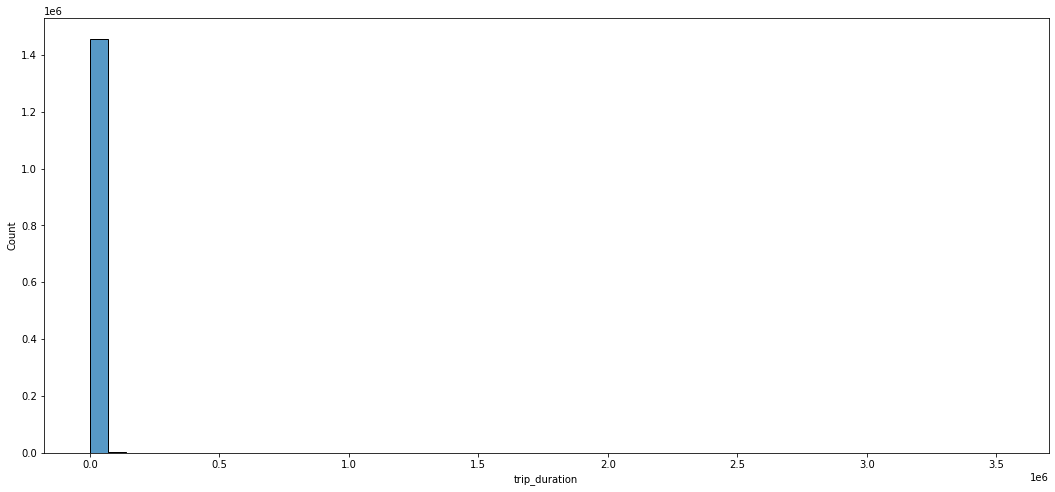

In [94]:
sns.histplot(x= merged_train_df["trip_duration"],bins = 50)

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

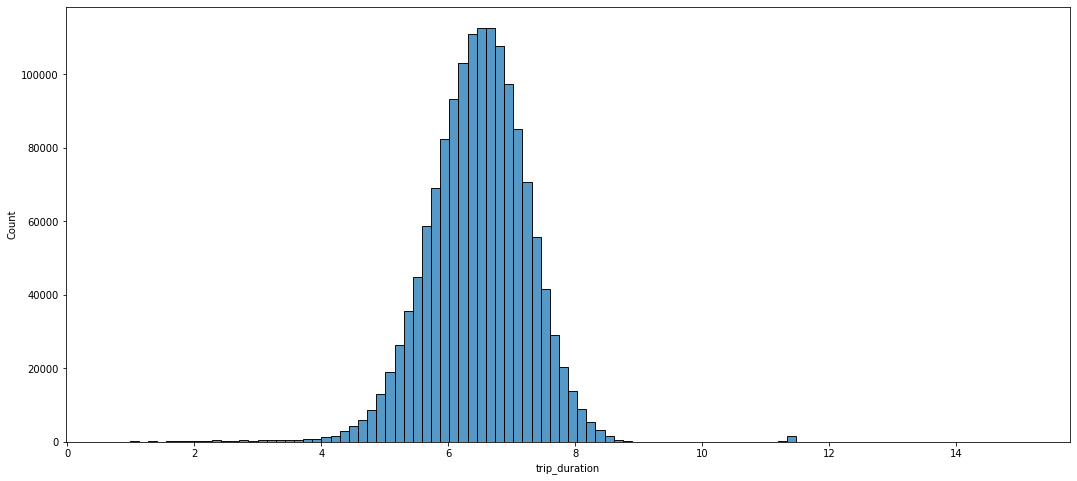

In [95]:
sns.histplot(x= np.log(merged_train_df["trip_duration"]+1),bins = 100)

Seems that most trips are within the range. If we take log scale, then the data becomes normalised.

In [96]:
new_merged_train_df ["trip_duration"]= np.log(new_merged_train_df ["trip_duration"] + 1) 

<AxesSubplot:xlabel='trip_duration', ylabel='haversine_distance'>

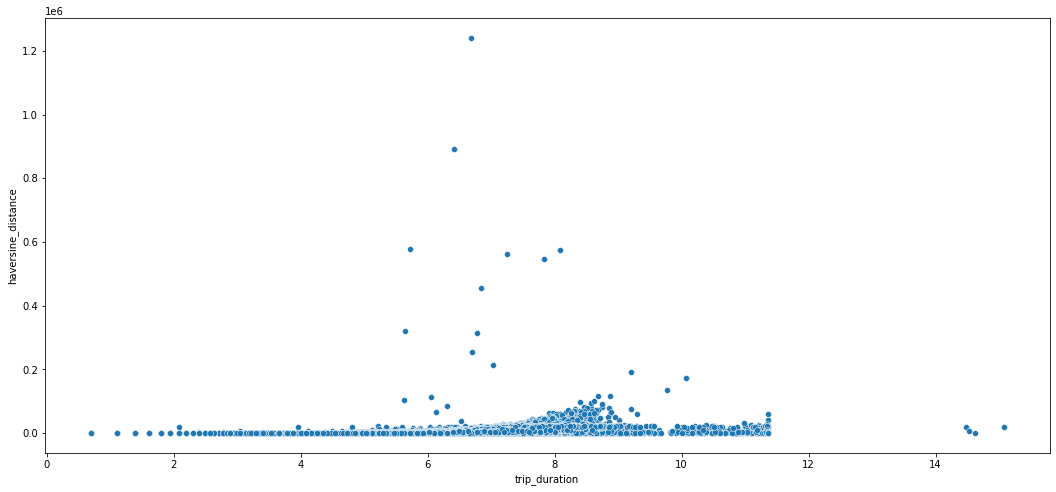

In [97]:

sns.scatterplot(x = new_merged_train_df["trip_duration"] , y =new_merged_train_df["haversine_distance"])

Seems there is a weak relation here.Let us take a log scale for haversine.

<AxesSubplot:xlabel='trip_duration', ylabel='haversine_distance'>

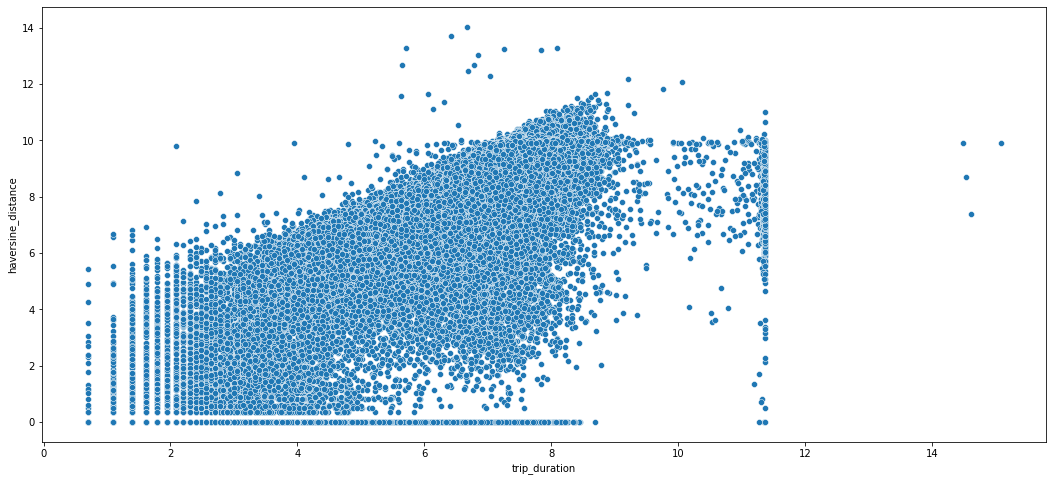

In [98]:
sns.scatterplot(x = new_merged_train_df["trip_duration"] , y =np.log(new_merged_train_df["haversine_distance"]+1))

As we can see, there is a certain linear relation between the `haversine_distance` and `trip_duration`, which makes sense. We can assume that this will be the case for `manhatten_distance` as well.

<AxesSubplot:xlabel='trip_duration', ylabel='manhatten_distance'>

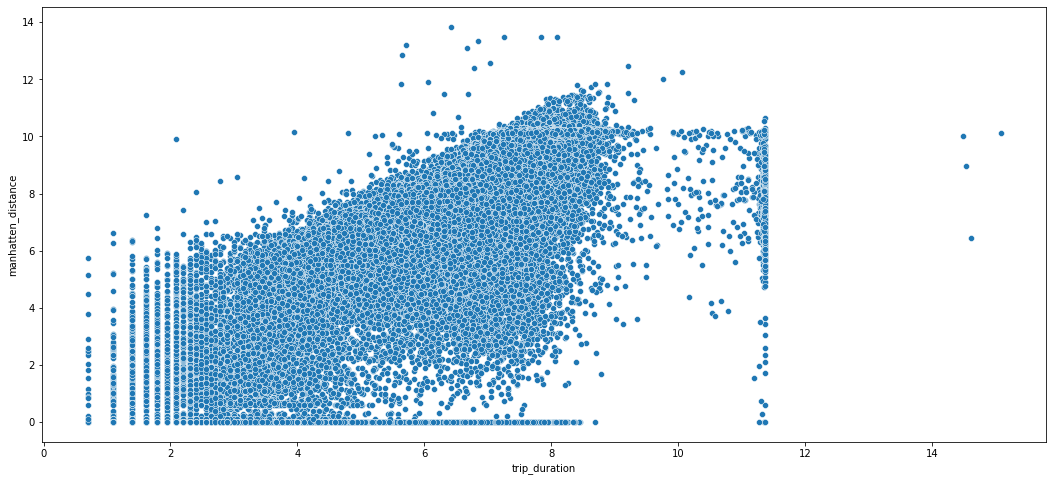

In [99]:
sns.scatterplot(x = new_merged_train_df["trip_duration"] , y =np.log(new_merged_train_df["manhatten_distance"]+1))

we can see that log scale of each `distance` column is a much better estimator of trip duration. So we will convert the scales to log scale for each dataset.

In [100]:
new_merged_train_df["haversine_distance"] = np.log(new_merged_train_df["haversine_distance"]+1)
new_merged_train_df["manhatten_distance"] = np.log(new_merged_train_df["manhatten_distance"]+1)


new_merged_test_df["manhatten_distance"] = np.log(new_merged_test_df["manhatten_distance"]+1)
new_merged_test_df["haversine_distance"] = np.log(new_merged_test_df["haversine_distance"]+1)


<AxesSubplot:xlabel='trip_duration', ylabel='bearing'>

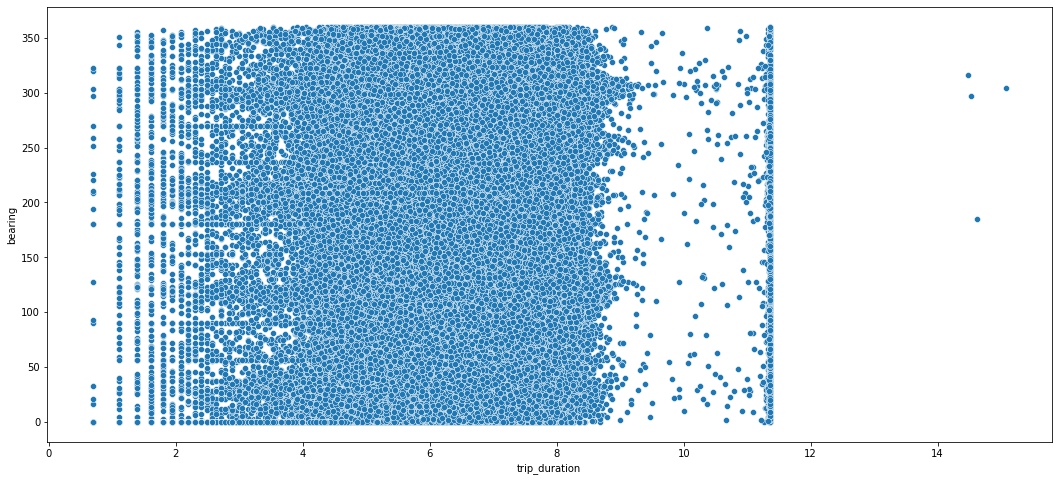

In [101]:
sns.scatterplot(x = new_merged_train_df["trip_duration"] , y =new_merged_train_df["bearing"])

<AxesSubplot:xlabel='trip_duration', ylabel='bearing'>

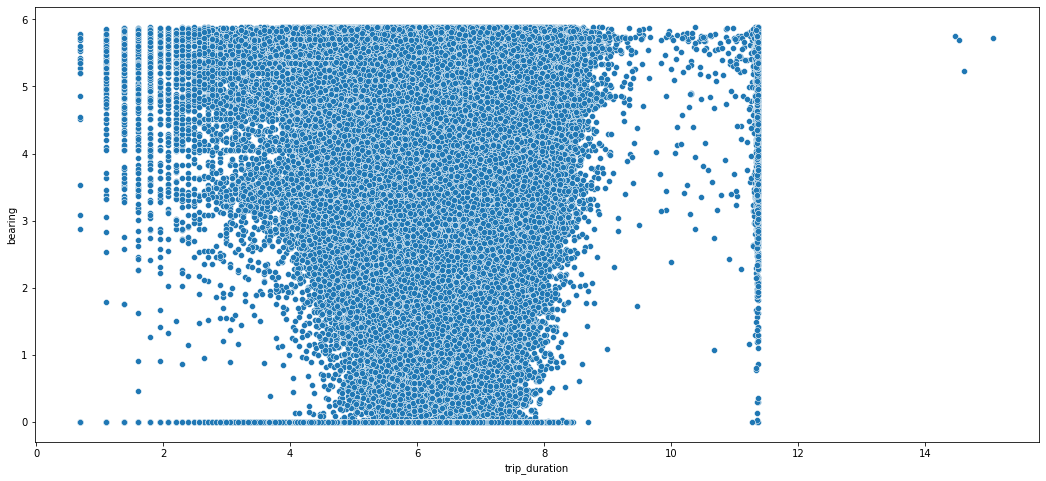

In [102]:
sns.scatterplot(x = new_merged_train_df["trip_duration"] , y =np.log(new_merged_train_df["bearing"]+1))

Seems that bearing or heading direction is not having that much of a relation with trip duration, even after log or any other transformation.

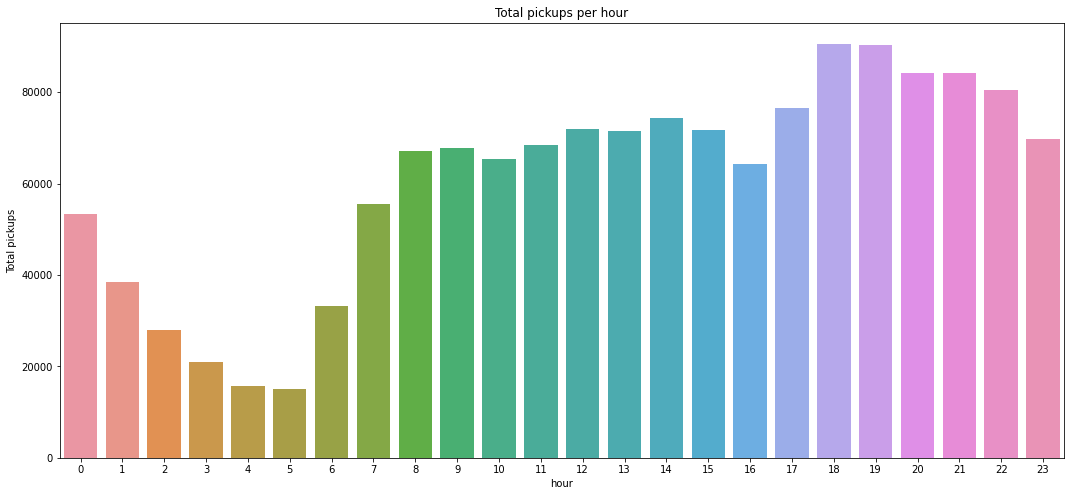

In [103]:

sns.countplot(x=new_merged_train_df.hour)
plt.title('Total pickups per hour')
plt.ylabel('Total pickups')
plt.show()

Seems that at the time of 6-9 pm is
 when taxi's are availed the most.

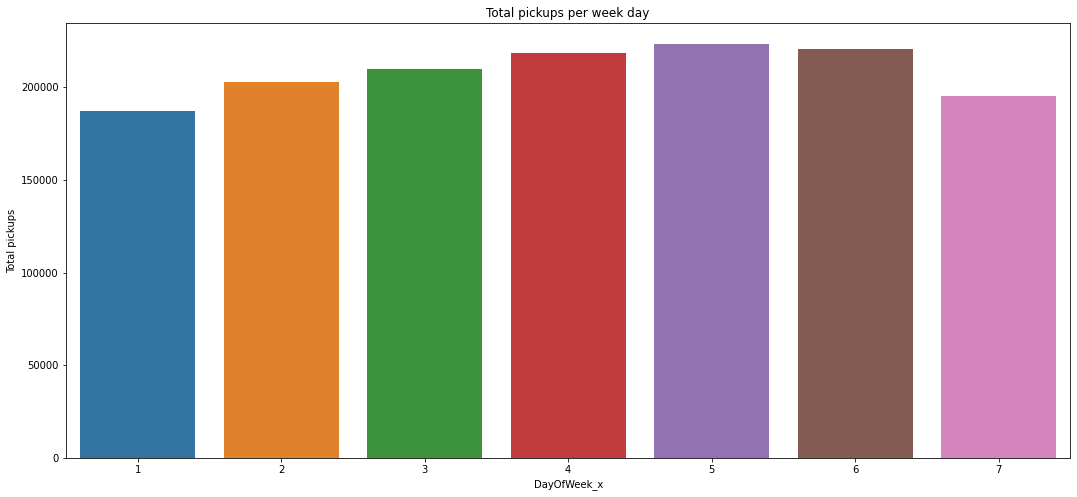

In [104]:

sns.countplot(x=new_merged_train_df.DayOfWeek_x)
plt.title('Total pickups per week day')
plt.ylabel('Total pickups')
plt.show()

Seems Thursday-Saturday has the most amount of taxi's being availed.

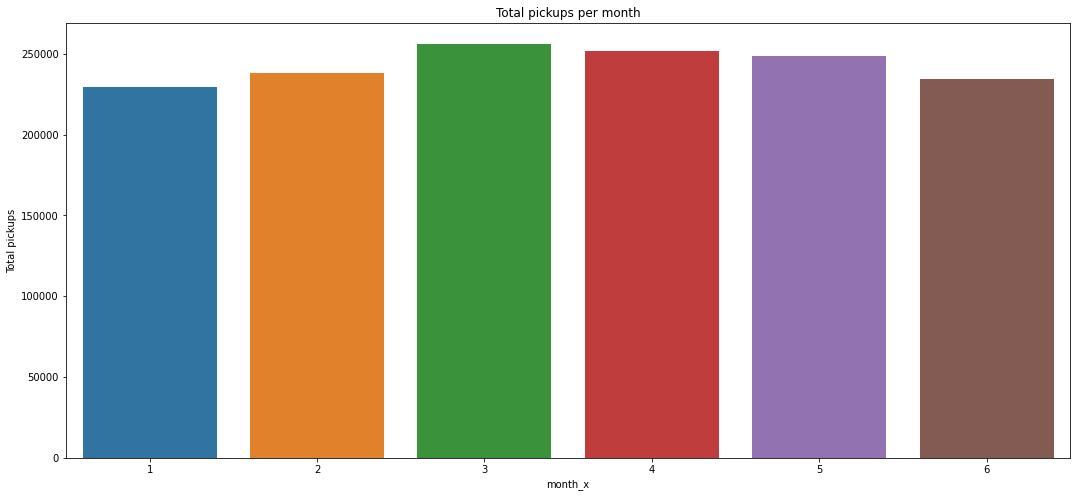

In [105]:
sns.countplot(x=new_merged_train_df.month_x)
plt.title('Total pickups per month')
plt.ylabel('Total pickups')
plt.show()

This one seems to be mostly uniform.

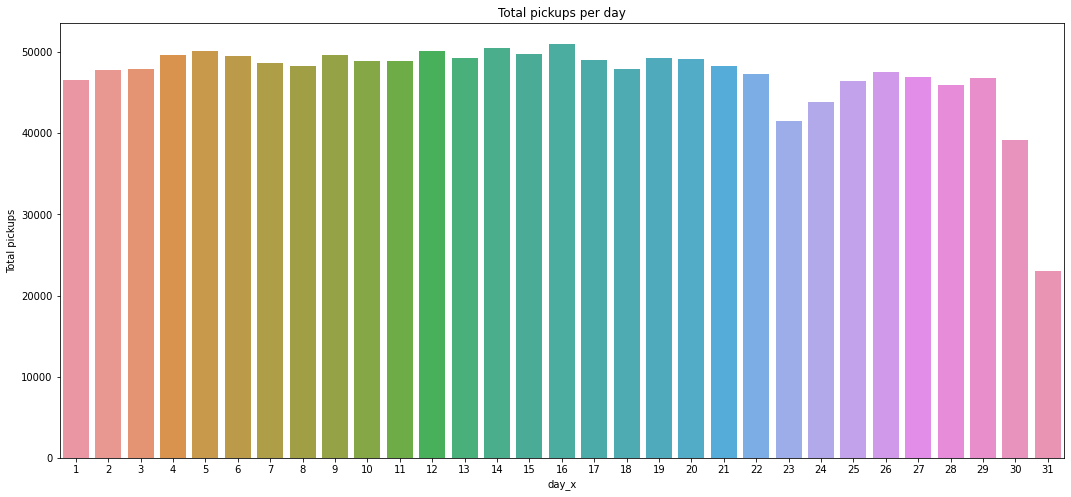

In [106]:
sns.countplot(x = new_merged_train_df.day_x)
plt.title("Total pickups per day")
plt.ylabel("Total pickups")
plt.show()

Now, let us see the vendor wise distribution of these above plots.

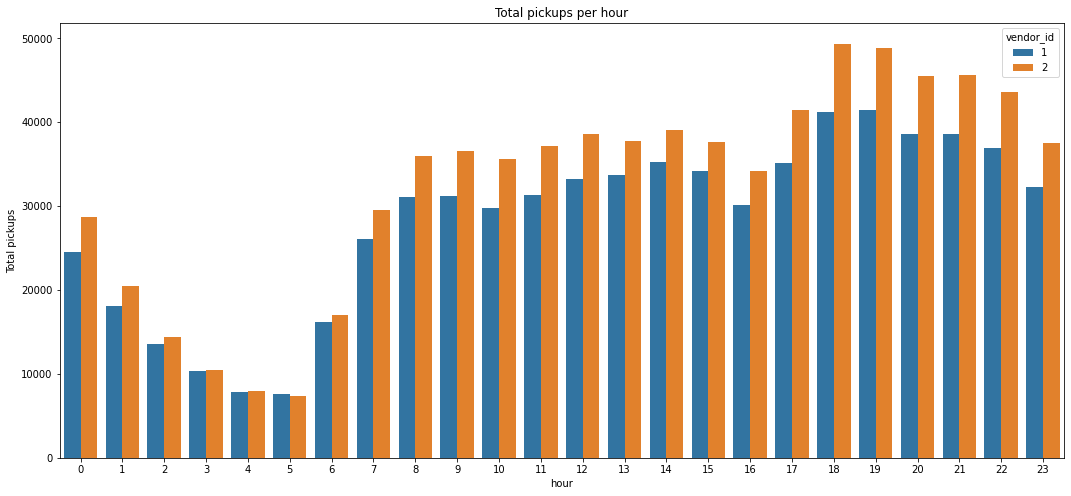

In [107]:

sns.countplot(data =new_merged_train_df,x = "hour", hue = "vendor_id" )
plt.title('Total pickups per hour')
plt.ylabel('Total pickups')
plt.show()

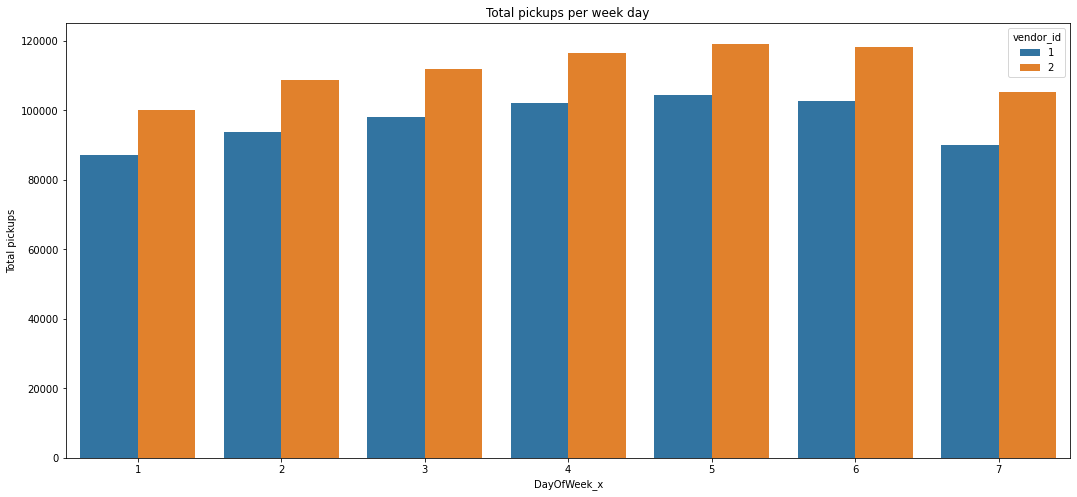

In [108]:

sns.countplot(data =new_merged_train_df,x = "DayOfWeek_x", hue = "vendor_id" )
plt.title('Total pickups per week day')
plt.ylabel('Total pickups')
plt.show()

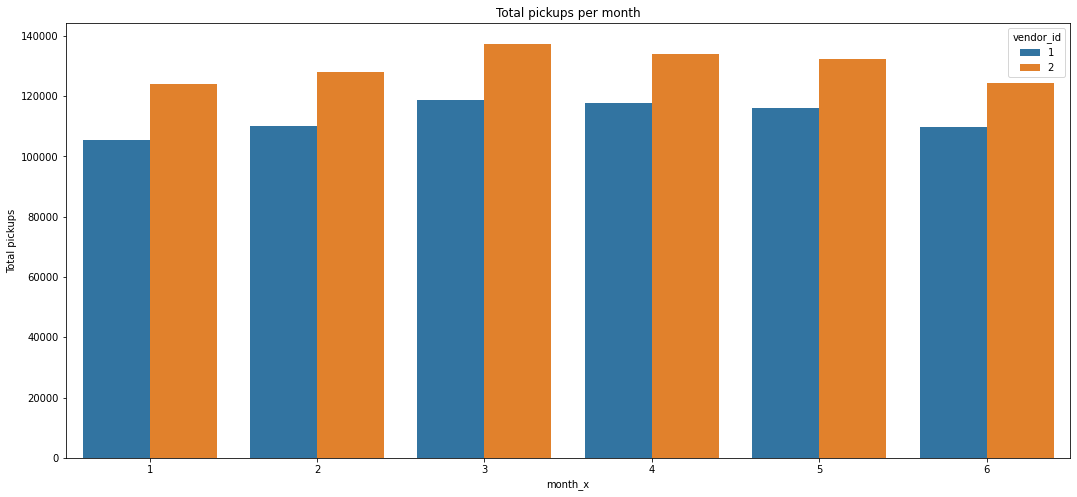

In [109]:
sns.countplot(data =new_merged_train_df,x = "month_x", hue = "vendor_id" )
plt.title('Total pickups per month')
plt.ylabel('Total pickups')
plt.show()

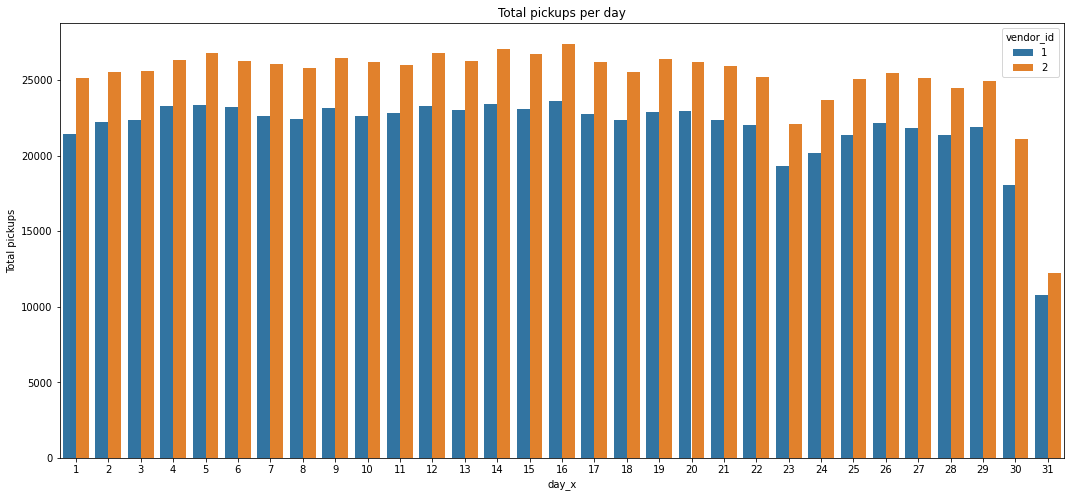

In [110]:
sns.countplot(data =new_merged_train_df,x = "day_x", hue = "vendor_id")
plt.title('Total pickups per day')
plt.ylabel('Total pickups')
plt.show()

We can see that vendor 2 is having a slight lead in overall number of pickups. We can make an educated guess and say that maybe vendor 2 has a bigger fleet of taxi's as compared to vendor 1, leading to more number of customers that it can serve.

In [111]:
df = pd.pivot_table(data = new_merged_train_df, values = "id", index = "vendor_id",aggfunc = "count")/ len(new_merged_train_df["id"]) * 100

In [112]:
df

,id
vendor_id,
1,46.504761
2,53.495239


As we can see, 53.5% of the trips have been done by vendor 2 while vendor 1 has done 46.5% of the trips.

Let us also see the correlation matrix visualisation.

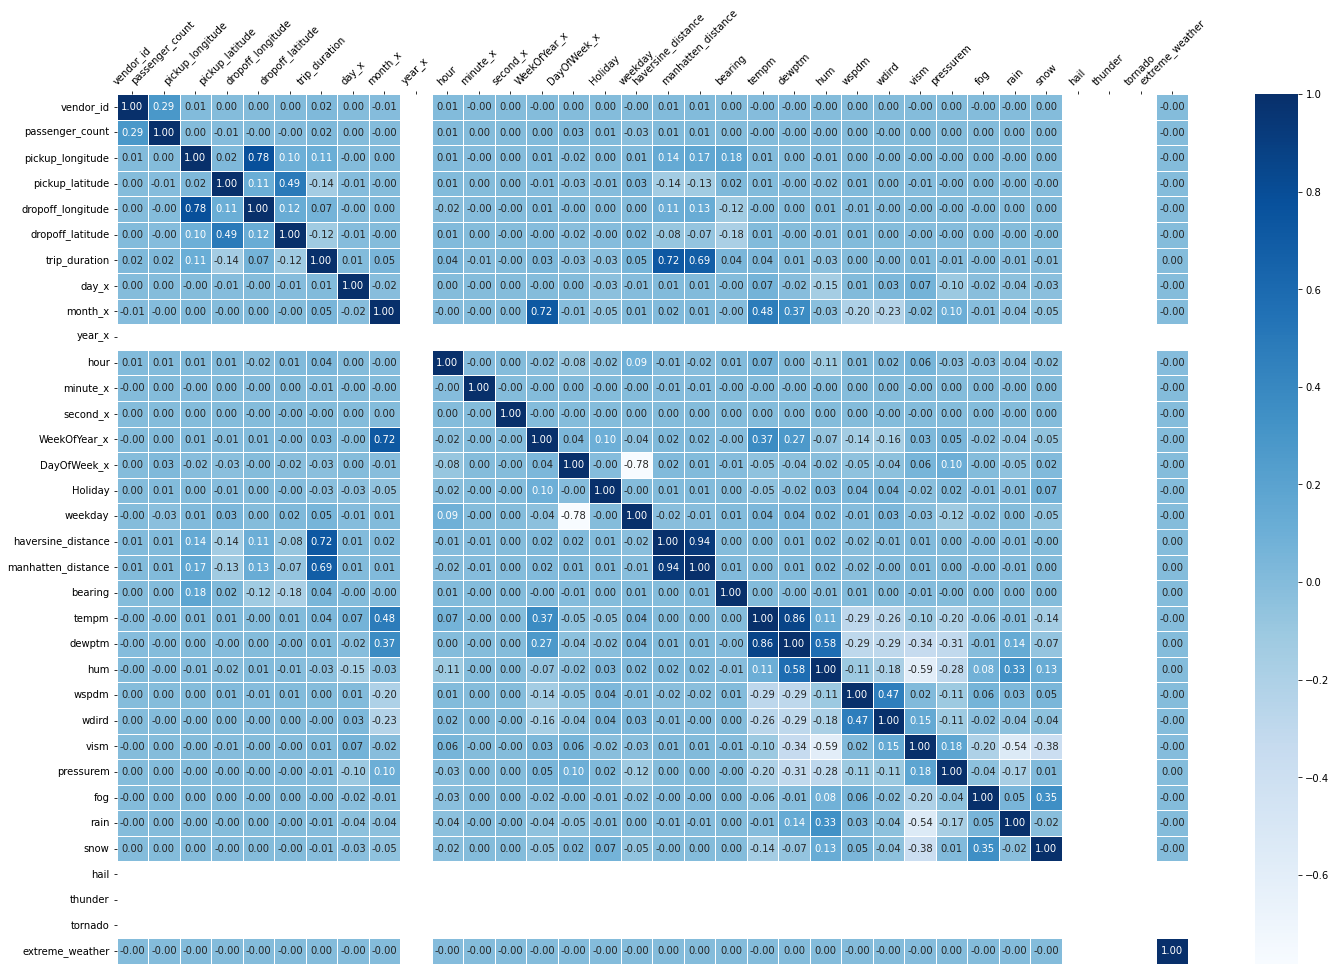

In [113]:
plt.figure(figsize = (24,16))

ax = sns.heatmap(data = new_merged_train_df.corr(), annot = True, linewidths = 0.5,fmt = "0.2f", cmap = "Blues")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation = 45);

Manhatten and Haversine distance seems to be the most correlated feature with trip duration.

 ## Modeling

Here we finally move to the modelling stage of our algorithm. Here, we will be using the famous XGBoost library to create a Gradient Boosting Machine thet can accurately predict accurately based on the input. We will be tuning the hyperparameters as well for optimal model performance. But before that, we need to tune our dataset through imputation, scaling and encoding of the dataset.

 ### Imputation

In this step, we will be encoding for the missing values of the dataset. For this, we will be using the Iterative imputer of Scikit-Learn library to impute these values. The Iterative imputer is experimental in nature and so we must first enable it and then we can work with it.

Iterative Imputer is a smarter imputer as compared to the Simple Imputer as it estimates each feature from all the others. But before all that, we need to split our dataset so as we get a crossvalidation set.

In [114]:
train_inputs = new_merged_train_df.drop("trip_duration",axis = 1)
train_targets = new_merged_train_df["trip_duration"]



In [115]:
from sklearn.model_selection import train_test_split

train_inputs,val_inputs, train_targets,val_targets = train_test_split(train_inputs,train_targets,test_size = 0.3,random_state = 42)

test_inputs = new_merged_test_df.copy()

In [116]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [117]:
imputer = IterativeImputer(n_nearest_features = 5,random_state = 42)

In [118]:
numeric_features_to_impute= ["tempm","dewptm","hum","wspdm","vism","pressurem","wdird"]

In [119]:
imputer.fit(train_inputs[numeric_features_to_impute])

IterativeImputer(n_nearest_features=5, random_state=42)

In [120]:
train_inputs[numeric_features_to_impute] = imputer.transform(train_inputs[numeric_features_to_impute])

In [121]:
# do the same for test and validation set

val_inputs[numeric_features_to_impute] = imputer.transform(val_inputs[numeric_features_to_impute])
test_inputs[numeric_features_to_impute] = imputer.transform(test_inputs[numeric_features_to_impute])

Now that we have imputed these numerical data, let us move on to the categorical data. For these, we will just replace them with the most frequent values.

In [122]:
train_wdire_mode = train_inputs.wdire.mode()[0]
train_conds_mode  = train_inputs.conds.mode()[0]
train_fog_mode = train_inputs.fog.mode()[0]
train_rain_mode = train_inputs.rain.mode()[0]
train_hail_mode = train_inputs.hail.mode()[0]
train_thunder_mode = train_inputs.thunder.mode()[0]
train_tornado_mode = train_inputs.tornado.mode()[0]
train_snow_mode = train_inputs.snow.mode()[0]

In [123]:
train_inputs.wdire.fillna(value = train_wdire_mode,inplace = True)
train_inputs.conds.fillna(value = train_conds_mode,inplace = True )
train_inputs.fog.fillna(value = train_fog_mode ,inplace = True)
train_inputs.rain.fillna(value = train_rain_mode ,inplace = True)
train_inputs.hail.fillna(value = train_hail_mode ,inplace = True)
train_inputs.thunder.fillna(value = train_thunder_mode ,inplace = True)
train_inputs.tornado.fillna(value = train_tornado_mode ,inplace = True)
train_inputs.snow.fillna(value = train_snow_mode ,inplace = True)

We are not going to fill the value of the icon column as it is redundant for us, so we will just drop it 

In [124]:
train_inputs.drop("icon",axis = 1,inplace = True)

Now, we will do the same for the test and validation sets.

In [125]:
val_inputs.wdire.fillna(value = train_wdire_mode,inplace = True)
val_inputs.conds.fillna(value = train_conds_mode,inplace = True )
val_inputs.fog.fillna(value = train_fog_mode ,inplace = True)
val_inputs.rain.fillna(value = train_rain_mode ,inplace = True)
val_inputs.hail.fillna(value = train_hail_mode ,inplace = True)
val_inputs.thunder.fillna(value = train_thunder_mode ,inplace = True)
val_inputs.tornado.fillna(value = train_tornado_mode ,inplace = True)
val_inputs.snow.fillna(value = train_snow_mode ,inplace = True)

In [126]:
test_inputs.wdire.fillna(value = train_wdire_mode,inplace = True)
test_inputs.conds.fillna(value = train_conds_mode,inplace = True )
test_inputs.fog.fillna(value = train_fog_mode ,inplace = True)
test_inputs.rain.fillna(value = train_rain_mode ,inplace = True)
test_inputs.hail.fillna(value = train_hail_mode ,inplace = True)
test_inputs.thunder.fillna(value = train_thunder_mode ,inplace = True)
test_inputs.tornado.fillna(value = train_tornado_mode ,inplace = True)
test_inputs.snow.fillna(value = train_snow_mode ,inplace = True)

In [127]:
test_inputs.drop("icon",axis = 1,inplace = True)
val_inputs.drop("icon",axis = 1,inplace = True)


### Scaling

Here we will be using the MinMax scaler of scikit-learn to scale the non-categorical columns. 

In [128]:
train_inputs.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'date',
       'day_x', 'month_x', 'year_x', 'hour', 'minute_x', 'second_x',
       'WeekOfYear_x', 'DayOfWeek_x', 'Holiday', 'weekday',
       'haversine_distance', 'manhatten_distance', 'bearing', 'tempm',
       'dewptm', 'hum', 'wspdm', 'wdird', 'wdire', 'vism', 'pressurem',
       'conds', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado',
       'extreme_weather'],
      dtype='object')

In [129]:
numeric_cols = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'hour', 'minute_x', 'second_x',
       'WeekOfYear_x', 'DayOfWeek_x','weekday',
       'haversine_distance', 'manhatten_distance', 'bearing', 'tempm',
       'dewptm', 'hum', 'wspdm', 'wdird', 'vism', 'pressurem']
            

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [131]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [132]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

Do the same for the test set and validation set

In [133]:
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Now we have scaled the numerical values. Let us move to the next step which is encoding of the categorical columns.

### Encoding

In this step, we will be encoding the categorical labels of the dataset. Now, there are some columns that are ordinal in nature and some that are non-ordinal in nature.So, we need to enocde them separately. The non-ordinal columns will be one hot encoded and ordinal ones will be ordinal encoded.

But before that, there are some columns which only have one value to them and hence are useless for us.

In [134]:
train_inputs.hail.unique(),train_inputs.thunder.unique(),train_inputs.fog.unique(),train_inputs.rain.unique(),train_inputs.snow.unique(), train_inputs.tornado.unique(),train_inputs.wdire.unique()


(array([0.]),
 array([0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0.]),
 array(['ENE', 'Variable', 'West', 'WSW', 'North', 'WNW', 'East', 'South',
        'SSW', 'NE', 'NW', 'NNE', 'SW', 'NNW', 'SSE', 'ESE', 'SE'],
       dtype=object))

We can see that columns hail , thunder and tornado have only 1 single value. So we will drop these columns.

In [135]:
train_inputs.drop(["thunder","hail","tornado"],axis = 1, inplace = True)
test_inputs.drop(["thunder","hail","tornado"],axis = 1, inplace = True)
val_inputs.drop(["thunder","hail","tornado"],axis = 1, inplace = True)

Now the only column ordinal in nature is `conds` column and so we will ordinal encode it.

In [136]:
map_conds = {"Unknown":0,"Clear":1,"Haze":2,"Overcast":3, 
             "Scattered Clouds" : 4,"Partly Cloudy":5,"Mostly Cloudy":6,
             "Light Rain":7, "Light Freezing Rain":8,"Rain":9 ,
             "Heavy Rain":10, "Light Snow":11, "Snow":12,
             "Heavy Snow":13}



train_inputs.conds = train_inputs.conds.map(map_conds)
test_inputs.conds = test_inputs.conds.map(map_conds)
val_inputs.conds = val_inputs.conds.map(map_conds)

Next we move to the One Hot encoding step. Here, we will use Scikit Learns OneHotEncoder.

In [137]:
categorical_cols_to_oh_encode = ['store_and_fwd_flag','DayOfWeek_x','WeekOfYear_x','Holiday','weekday','month_x','day_x','fog','rain','snow','extreme_weather','wdire']

In [138]:
from sklearn.preprocessing import OneHotEncoder

encoder =  OneHotEncoder(sparse=False, handle_unknown='ignore')

In [139]:
encoder.fit(train_inputs[categorical_cols_to_oh_encode])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols_to_oh_encode))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols_to_oh_encode])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


Do the same for validation and test set

In [140]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols_to_oh_encode])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols_to_oh_encode])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


So, our final dataset becomes as follows

In [141]:
train_inputs = train_inputs[numeric_cols + encoded_cols]
val_inputs = val_inputs[numeric_cols + encoded_cols]
test_inputs = test_inputs[numeric_cols + encoded_cols]

### Model Creation and  Hyperparameter tuning

Finally, Let us move to the model implementation stage. Here, we will declare our model and tune it's hyperparameters to get a good model. We will be building 2 models here, namely a Single Decision Tree using  Scikit Learn and a Gradient Boosting Machine using XGBoost which is an ensemble model.

In [142]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

We will also define some helper functions that will help in hyperparameter tuning. In practice tho, usually going through all possible values combination is not an good idea but rather choosing some sensible values and then finding combinations among them is much better option. Tradeoff between accuracy and complexity or accuracy and time of training need to be evaluated beforehand.

In [143]:

from sklearn.metrics import mean_squared_log_error

# the function is from here :https://www.kaggle.com/code/carlolepelaars/understanding-the-metric-rmsle/notebook
def rmsle(y_true: list, y_pred: list) -> float:
    """
    The Root Mean Squared Log Error (RMSLE) metric using only NumPy
    
    :param y_true: The ground truth labels given in the dataset
    :param y_pred: Our predictions
    :return: The RMSLE score
    """
    n = len(y_true)
    rmsle = np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))
    return rmsle

In [178]:
# this function helps to tune various Hyperparameters of GBM by calculation of train and validation error
def calc_train_val_error_xgb(**params):
    
        model =  XGBRegressor(n_jobs=-1, random_state=42, tree_method = "gpu_hist",
                              max_depth = 7,n_estimators = 30,
                              learning_rate = 0.35,colsample_bytree = 0.80,
                              min_child_weight = 10,subsample= 0.70,
                              **params)
        model.fit(train_inputs, train_targets)
        train_rmsle = rmsle(model.predict(train_inputs), train_targets)
        val_rmsle = rmsle(model.predict(val_inputs),val_targets)
    
        return {"Training Error":train_rmsle,"Validation Error": val_rmsle, str(list(params.keys())[0]):list(params.values())[0]}

In [165]:
# this function helps to tune various Hyperparameters of Decision Tree by calculation of train and validation error
def calc_train_val_error_dt(**params):

        model =  DecisionTreeRegressor(random_state=42,max_depth = 12,
                                       max_features = 94,
                                       min_samples_leaf = 51,**params)
        model.fit(train_inputs, train_targets)
        train_rmsle = rmsle(model.predict(train_inputs), train_targets)
        val_rmsle = rmsle(model.predict(val_inputs),val_targets)
        
        return {"Training Error":train_rmsle,"Validation Error": val_rmsle, str(list(params.keys())[0]):list(params.values())[0]}

In [149]:
# This function plots the training and validation error for determination of ideal hyperparameters 
def plot_train_val_error(df,x_label = ""):
 
  plt.figure(figsize=(22,8))
  plt.plot(df[list(df.columns)[-1]],df[list(df.columns)[0]], label = "Training Error")
  plt.plot(df[list(df.columns)[-1]],df[list(df.columns)[1]],label = "Validation Error")
  plt.xlabel(x_label)
  plt.ylabel("Error")
  plt.legend()
  plt.show()

#### Decision Tree

A Decision Tree, as the name suggests, is basically a tree consisting of nodes with each node containing examples from the entire Dataset. The nodes try to increase the homogenity.

In [149]:
# First we will find the ideal depth of the tree
depth_dt_df = pd.DataFrame([calc_train_val_error_dt(max_depth = i) for i in range(2,41,2)])

In [150]:
depth_dt_df.sort_values(by = "Validation Error")

,Training Error,Validation Error,max_depth
5,0.060556,0.064523,12
4,0.063413,0.064614,10
6,0.056799,0.065333,14
3,0.065927,0.066030,8
7,0.052199,0.067769,16
2,0.068668,0.068568,6
8,0.046645,0.070458,18
1,0.073205,0.073101,4
9,0.040643,0.073796,20
10,0.034356,0.076454,22


Seems 12 is the ideal depth of our Decision Tree. We will hardcode this in our helper function. Let us also plot the graph.

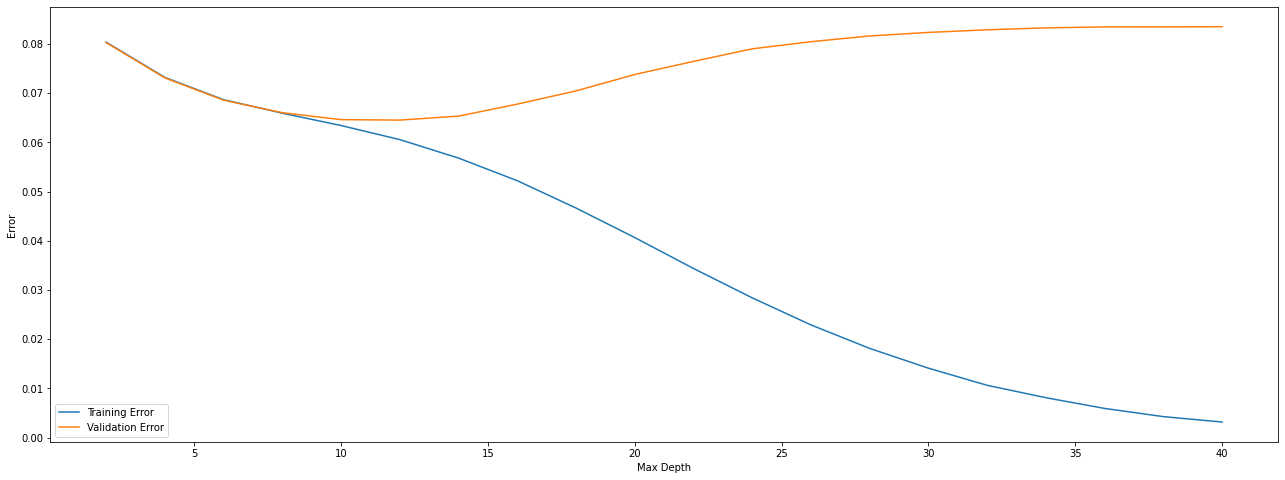

In [151]:
plot_train_val_error(depth_dt_df, x_label = "Max Depth")

In [154]:
#next let us try to find the ideal number of features as all features need not be 
# be considered for optimal predictions
max_features_dt_df = pd.DataFrame([calc_train_val_error_dt(max_features = i) for i in range(1,123,3)])

In [155]:
max_features_dt_df.sort_values(by = "Validation Error")

,Training Error,Validation Error,max_features
35,0.060700,0.064147,106
31,0.061195,0.064396,94
40,0.060573,0.064419,121
38,0.060696,0.064457,115
37,0.060733,0.064492,112
33,0.060862,0.064498,100
39,0.060759,0.064498,118
34,0.060844,0.064562,103
36,0.060716,0.064673,109
32,0.061000,0.064780,97


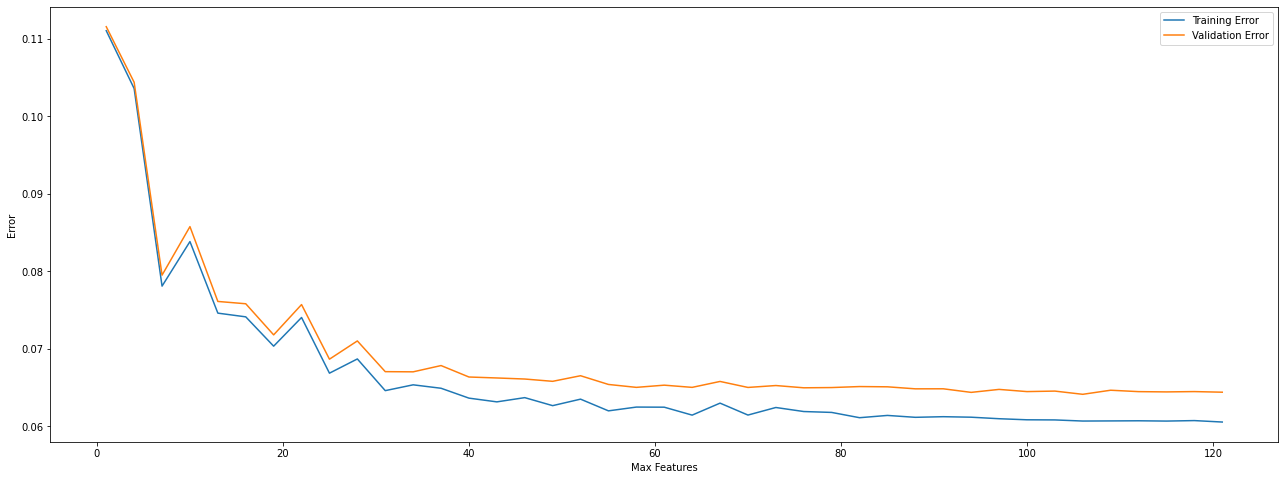

In [156]:
plot_train_val_error(max_features_dt_df, x_label = "Max Features")

After about 80 features, the error remains relatively same. So for the sake of computation efficiency, we take 94 features for consideration for each node.

In [158]:
#next we tune the parameter that controls the minimum number of sample needed at leaf node
min_samples_leaf_dt_df = pd.DataFrame([calc_train_val_error_dt(min_samples_leaf = i) for i in range(1,311,10)])

In [159]:
min_samples_leaf_dt_df.sort_values(by = "Validation Error")

,Training Error,Validation Error,min_samples_leaf
5,0.062011,0.063179,51
6,0.062133,0.063212,61
10,0.062438,0.063276,101
9,0.062437,0.063277,91
11,0.062397,0.063309,111
13,0.062663,0.063363,131
7,0.062270,0.063374,71
3,0.061876,0.063379,31
4,0.061879,0.063392,41
12,0.062597,0.063399,121


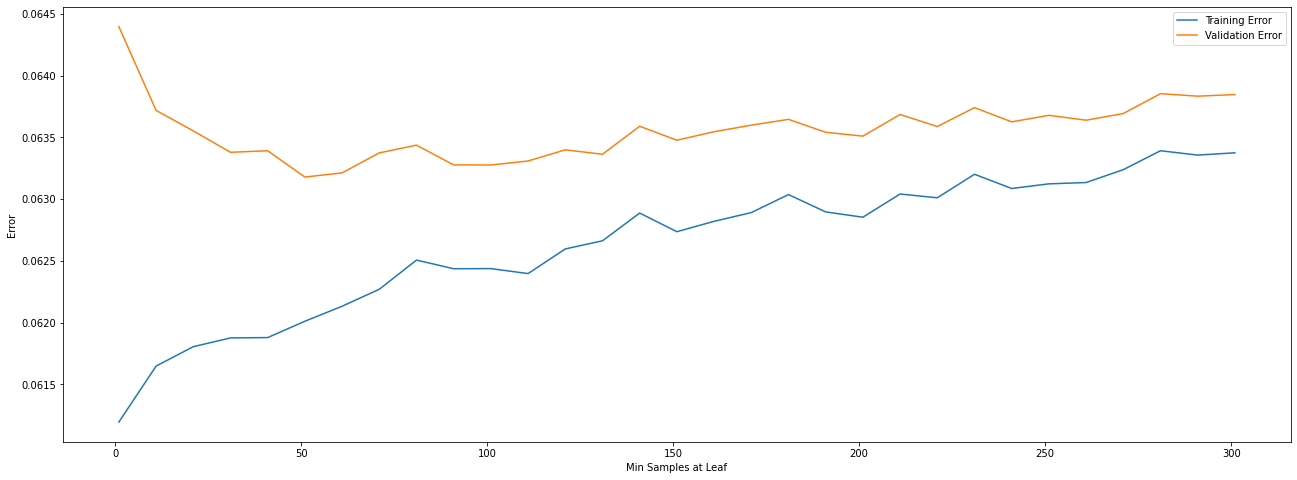

In [160]:
plot_train_val_error(min_samples_leaf_dt_df, x_label = "Min Samples at Leaf")

The curve is a becoming more underfitted as we increase the sample per node. So , we opt for 51 sample per node as at that value the validation error is minimum while  the same time the training error has not increase that much.

After all these, our final Decision Tree model becomes as follows.

In [180]:
final_dt_model = DecisionTreeRegressor(random_state=42,max_depth = 12,
                                       max_features = 94,min_samples_leaf = 51)

#### Gradient Boosting Machines

We have seen how effective an decision tree is on its own. However,a Gradient Boosted Machine can produce much more accurate predictions as compared to a single decision tree due to it being an ensemble model. For this, we will be using **XGBoost** library. There exists alternative to this library , namely, **LightGBM** and **CatBoost**.

In [146]:
# Let us first find the ideal depth of our trees

depth_xgb_df = pd.DataFrame([calc_train_val_error_xgb(max_depth = i) for i in range(1,20)])

In [147]:
depth_xgb_df.sort_values(by = "Validation Error")

,Training Error,Validation Error,max_depth
8,0.046511,0.058229,9
7,0.050062,0.058265,8
6,0.053260,0.058400,7
9,0.042656,0.058504,10
10,0.038619,0.058667,11
5,0.055889,0.058673,6
11,0.034615,0.059005,12
4,0.058014,0.059151,5
12,0.029711,0.059156,13
13,0.025037,0.059588,14


Seems depth of 9 is ideal. Let us also plot the error vs depth graph to get a better idea.

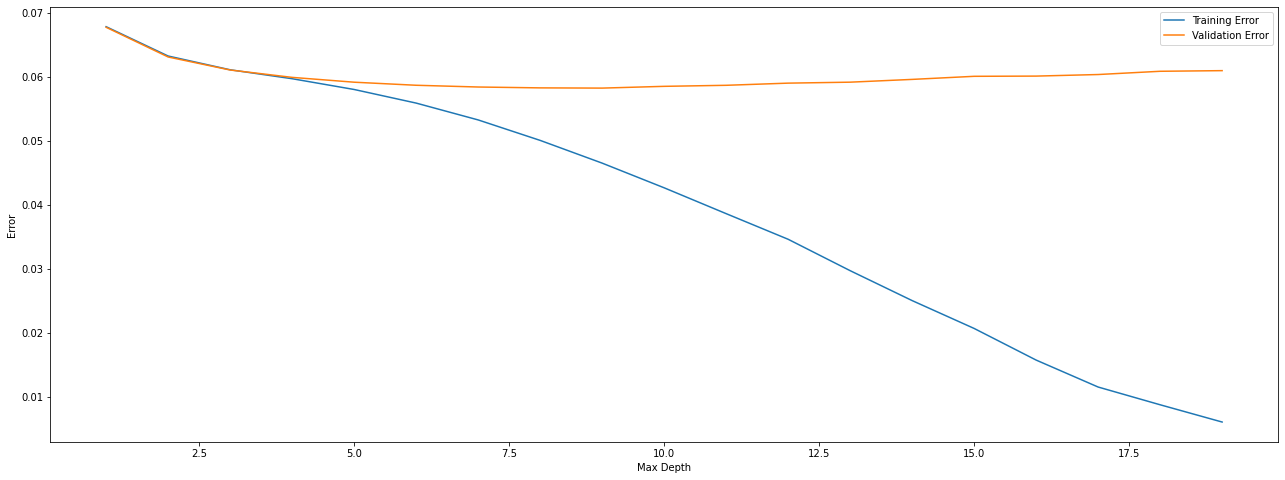

In [150]:
plot_train_val_error(depth_xgb_df,x_label = "Max Depth")

From a depth of 5, the validation error starts to increase very slightly and then remains constant. So, we can choose a depth of 7 to hardcode in our helper fuction.

In [152]:
# Next, let us find the ideal number of estimators(individual trees) 

estimators_xgb_df = pd.DataFrame([calc_train_val_error_xgb(n_estimators = i) for i in range(1,202,5)])

In [153]:
estimators_xgb_df.sort_values(by = "Validation Error")

,Training Error,Validation Error,n_estimators
27,0.051686,0.058192,136
28,0.051530,0.058196,141
36,0.049905,0.058203,181
33,0.050508,0.058204,166
26,0.051869,0.058204,131
31,0.050947,0.058205,156
35,0.050090,0.058206,176
32,0.050728,0.058215,161
37,0.049706,0.058216,186
29,0.051294,0.058219,146


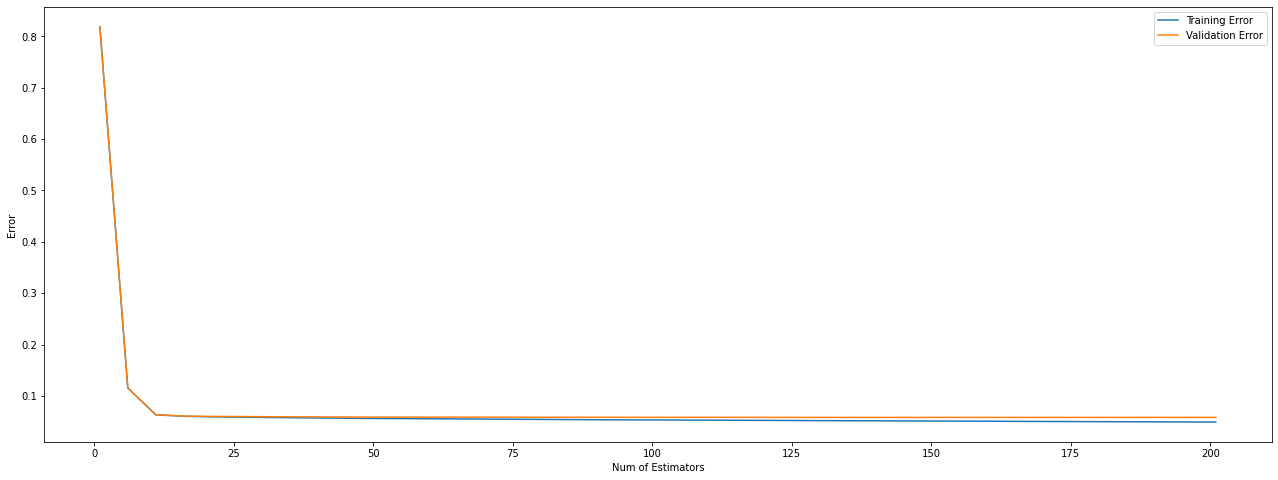

In [154]:
plot_train_val_error(estimators_xgb_df,x_label = "Num of Estimators")

We can see that about 20 estimators later, the model doesn't change much interms of validation error. So, we can hardcode a value of 30 estimators into our model.

In [157]:
#next let us choose the ideal value of learning rate

learning_rate_xgb_df = pd.DataFrame([calc_train_val_error_xgb(learning_rate = i/100) for i in range(10,100,5)])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log1p
  del sys.path[0]


In [158]:
learning_rate_xgb_df.sort_values(by = "Validation Error")

,Training Error,Validation Error,learning_rate
7,0.057029,0.059380,0.45
6,0.057421,0.059415,0.40
5,0.057826,0.059521,0.35
9,0.056616,0.059525,0.55
4,0.058187,0.059555,0.30
8,0.056917,0.059570,0.50
10,0.056476,0.059869,0.60
3,0.058731,0.059874,0.25
11,0.056433,0.060000,0.65
12,0.056852,0.060081,0.70


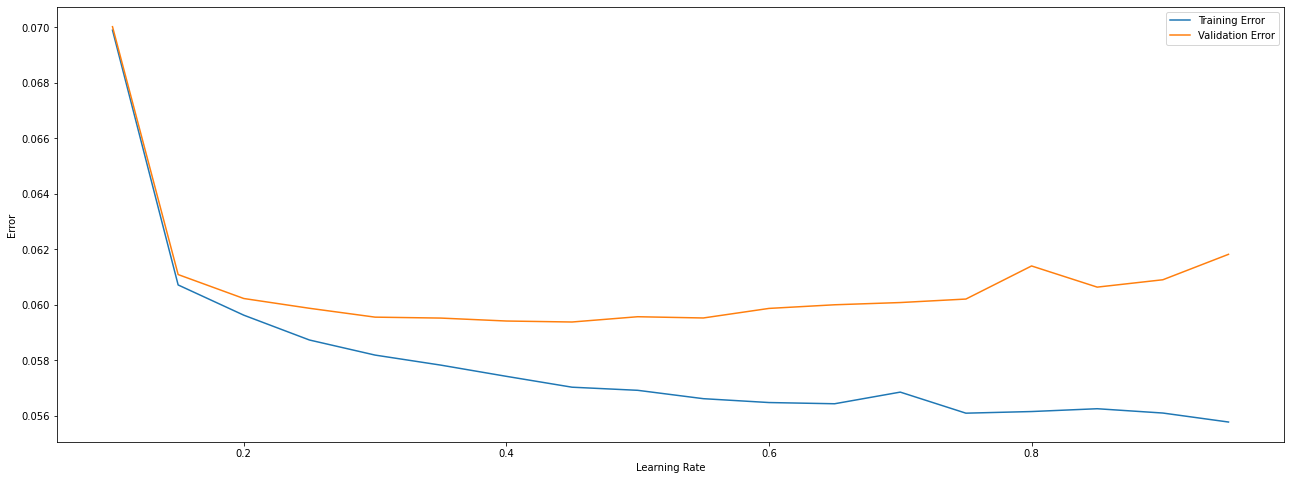

In [159]:
plot_train_val_error(learning_rate_xgb_df,x_label = "Learning Rate")

Seems that a good value of learning would be 0.25 to 0.45. We can choose the value of 0.35 as a good learning rate.

In [161]:
# next let us the our number of features needed for each tree as 
#not all trees require all the features

feature_fraction_xgb_df = pd.DataFrame([calc_train_val_error_xgb(colsample_bytree = i/100) for i in range(10,101,5)])


In [162]:
feature_fraction_xgb_df.sort_values(by="Validation Error")

,Training Error,Validation Error,colsample_bytree
14,0.057689,0.059375,0.80
16,0.057570,0.059432,0.90
12,0.057765,0.059443,0.70
15,0.057799,0.059497,0.85
17,0.057758,0.059504,0.95
13,0.057908,0.059512,0.75
18,0.057826,0.059521,1.00
11,0.057935,0.059538,0.65
10,0.058072,0.059553,0.60
6,0.058647,0.059626,0.40


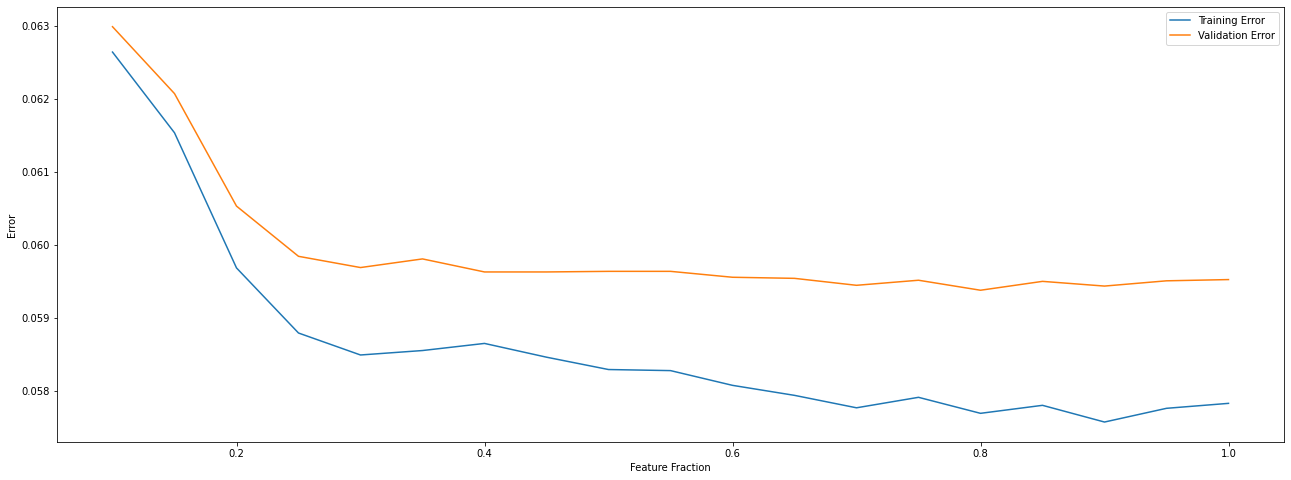

In [163]:
plot_train_val_error(feature_fraction_xgb_df,x_label = "Feature Fraction")

We can see that after about 80% features, the model is giving consistent values for the validation set. So we hardcode a value oof 0.80 for our model.

In [166]:
# next let us tune for gamma which controls the minimum loss required to split a node

gamma_xgb_df = pd.DataFrame([calc_train_val_error_xgb(gamma = i) for i in range(1,200,5)])


In [167]:
gamma_xgb_df.sort_values(by = "Validation Error")

,Training Error,Validation Error,gamma
0,0.057953,0.059392,1
1,0.058297,0.059450,6
2,0.059255,0.059806,11
3,0.059649,0.059952,16
4,0.060034,0.060258,21
6,0.060447,0.060489,31
5,0.060468,0.060578,26
7,0.060669,0.060689,36
8,0.060989,0.060962,41
10,0.061263,0.061186,51


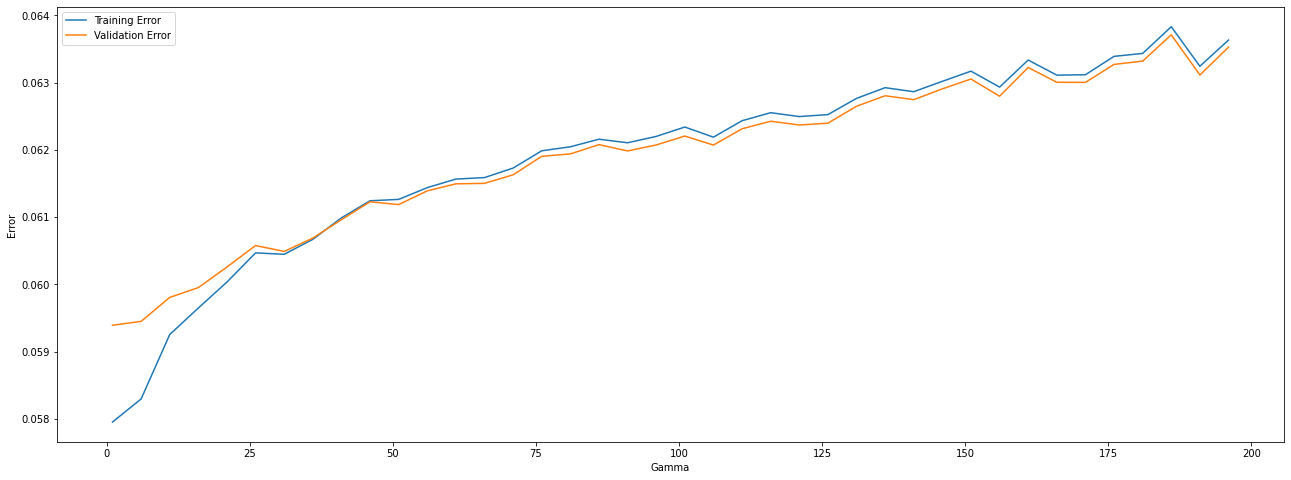

In [168]:
plot_train_val_error(gamma_xgb_df,x_label = "Gamma")

As we are increasing the value of Gamma, the error is increasing in both datasets. So, we opt for it's default value.

In [169]:
# next we look at the minimum child weight

minimum_cw_xgb_df = pd.DataFrame([calc_train_val_error_xgb(min_child_weight = i) for i in range(5,150,5)])

In [170]:
minimum_cw_xgb_df.sort_values(by = "Validation Error")

,Training Error,Validation Error,min_child_weight
6,0.058314,0.059253,35
13,0.058718,0.059324,70
4,0.058316,0.059327,25
10,0.058533,0.059341,55
14,0.058626,0.059348,75
21,0.058847,0.059377,110
28,0.058898,0.059380,145
17,0.058821,0.059385,90
8,0.058611,0.059389,45
15,0.058700,0.059392,80


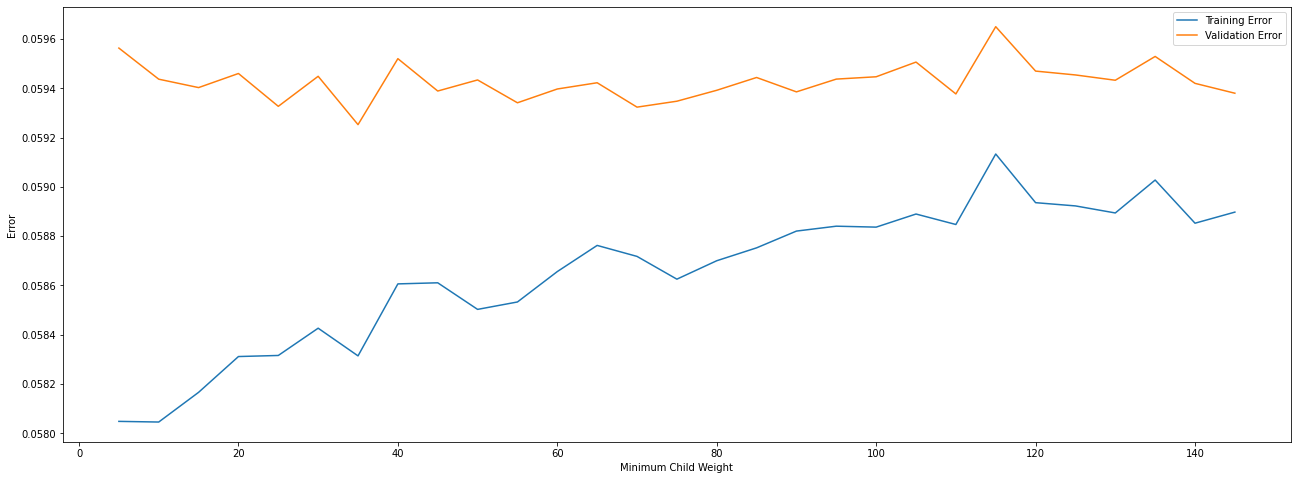

In [171]:
plot_train_val_error(minimum_cw_xgb_df,x_label = "Minimum Child Weight")

As we can see, if we keep increasing the child weight then the model starts to underfit on the training data. Hence, we choose a low value(say 10) to hardcode into our model.

In [173]:
#finally, we will find ideal subsample value that tells what fraction of dataset we
# need after which there is diminishing returns

subsample_xgb_df = pd.DataFrame([calc_train_val_error_xgb(subsample = i/100) for i in range(10,101,5)])

In [174]:
subsample_xgb_df.sort_values(by = "Validation Error")

,Training Error,Validation Error,subsample
18,0.058046,0.059437,1.00
12,0.058108,0.059520,0.70
13,0.058288,0.059534,0.75
16,0.058091,0.059561,0.90
17,0.058091,0.059564,0.95
15,0.058106,0.059584,0.85
14,0.058135,0.059636,0.80
9,0.058413,0.059665,0.55
10,0.058204,0.059694,0.60
11,0.058435,0.059820,0.65


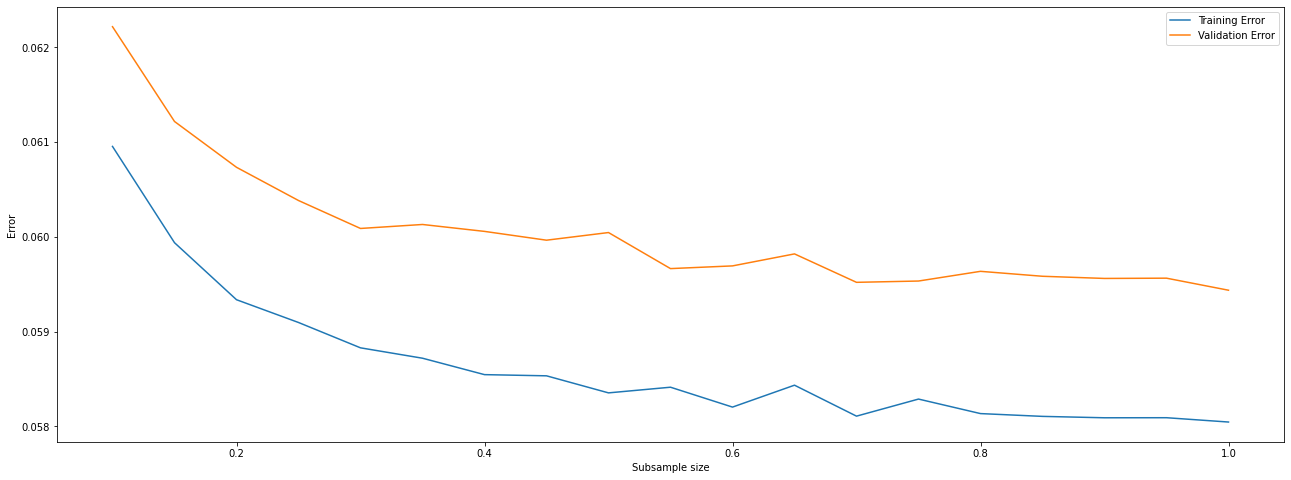

In [175]:
plot_train_val_error(subsample_xgb_df,x_label = "Subsample size")

Seems using about 70% of the dataset for model training gives good enough result while also leading to faster training of the model. Hece, we will incorporate this into the final model.

With these, we have gotten all the parameters we needed to work with. So, let us use this information and create the final model.

**Note**: Ideally, we will once again go through the process of tuning hyperparameter after getting these initial ones. However, I am avoiding these steps for saving time.

In [187]:
final_xgb_model = XGBRegressor(n_jobs=-1, random_state=42, tree_method = "gpu_hist",
                              max_depth = 7,n_estimators = 30,
                              eta = 0.35, colsample_bytree = 0.70,
                              min_child_weight = 10,subsample = 0.7)

## Making Predictions and Submission file

We now move towards the prediction stages of our model. Here , we will make 2 predictions, one for the Decision Tree and the other for the GBM.

Since, we are now moving to the training stage of our final models, we can use the entire dataset to train the model.

In [182]:
frames = [train_inputs, val_inputs]
frames_targets = [train_targets,val_targets]

training_df = pd.concat(frames)
targets_df= pd.concat(frames_targets)

In [186]:
final_dt_model.fit(training_df,targets_df)

DecisionTreeRegressor(max_depth=12, max_features=94, min_samples_leaf=51,
                      random_state=42)

In [188]:
final_xgb_model.fit(training_df,targets_df)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False, eta=0.35,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.349999994, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=10,
             missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

We can even see which features were important and which were not by plotting a horizontal bar graph for each model.

In [189]:
importance_dt_df = pd.DataFrame({
    'feature': training_df.columns,
    'importance': final_dt_model.feature_importances_
}).sort_values('importance', ascending=False)

In [190]:
importance_xgb_df = pd.DataFrame({
    'feature': training_df.columns,
    'importance': final_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

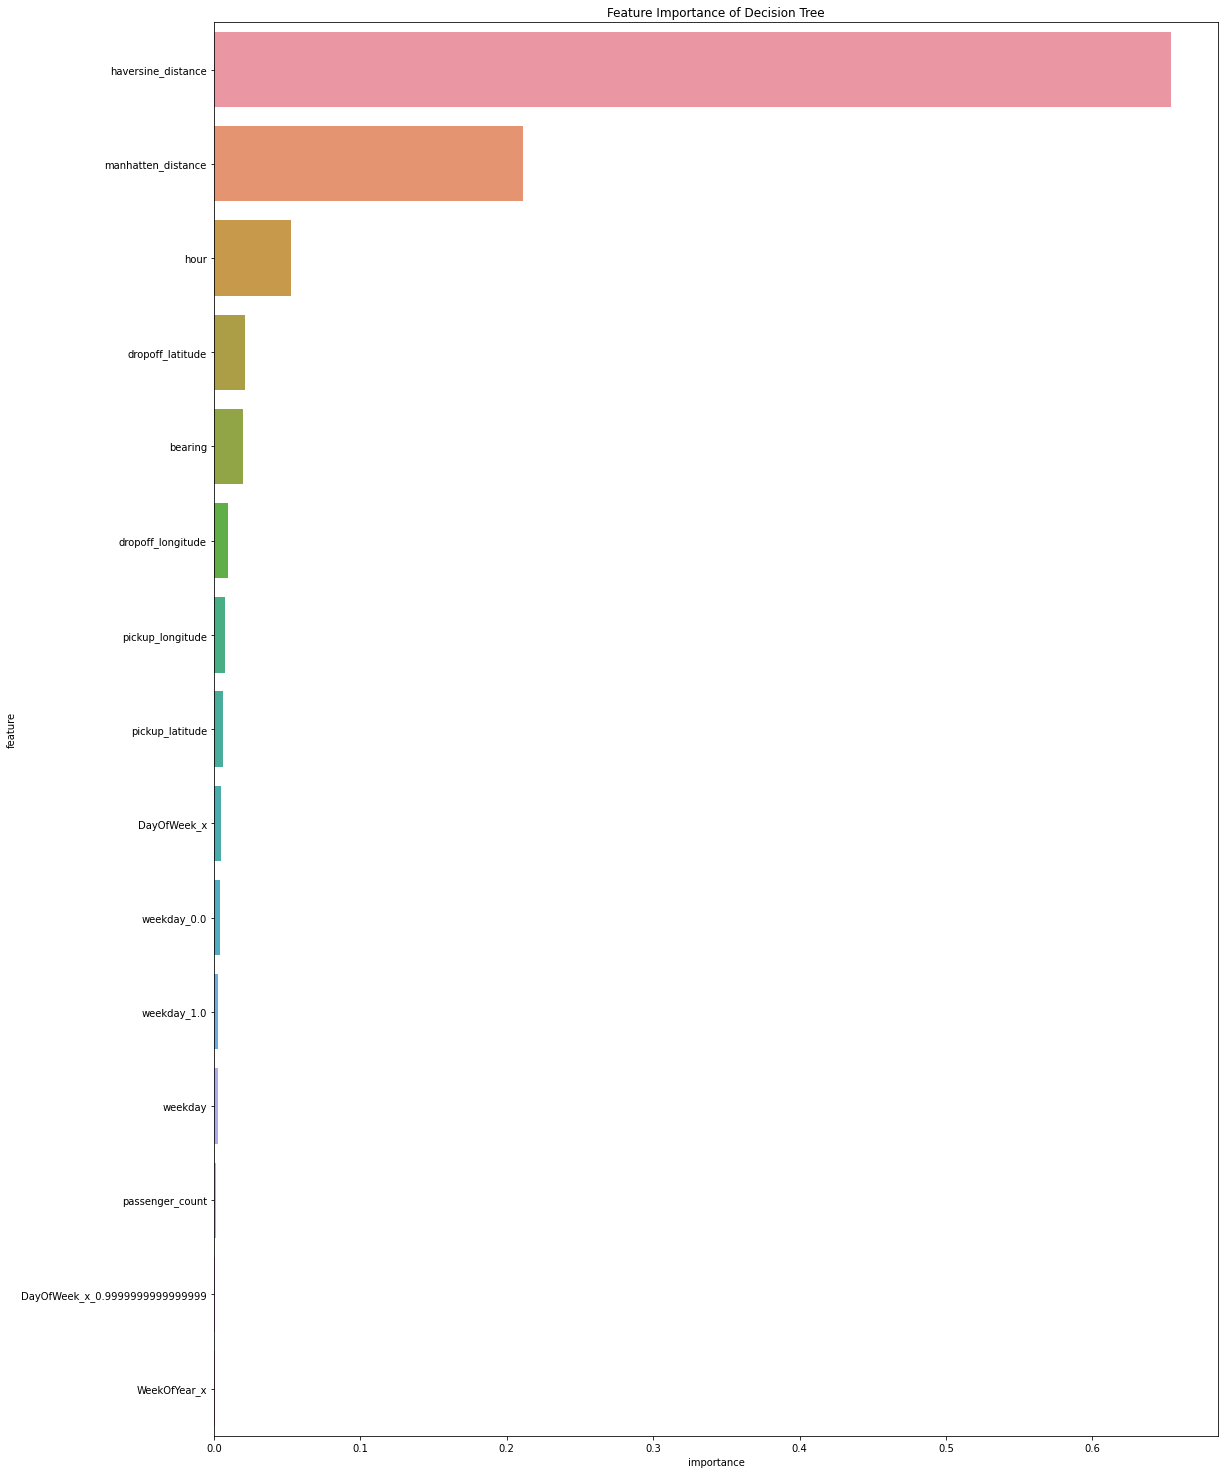

In [198]:
plt.figure(figsize = (18,26))
plt.title('Feature Importance of Decision Tree')

sns.barplot(data=importance_dt_df.head(15), x='importance', y='feature');

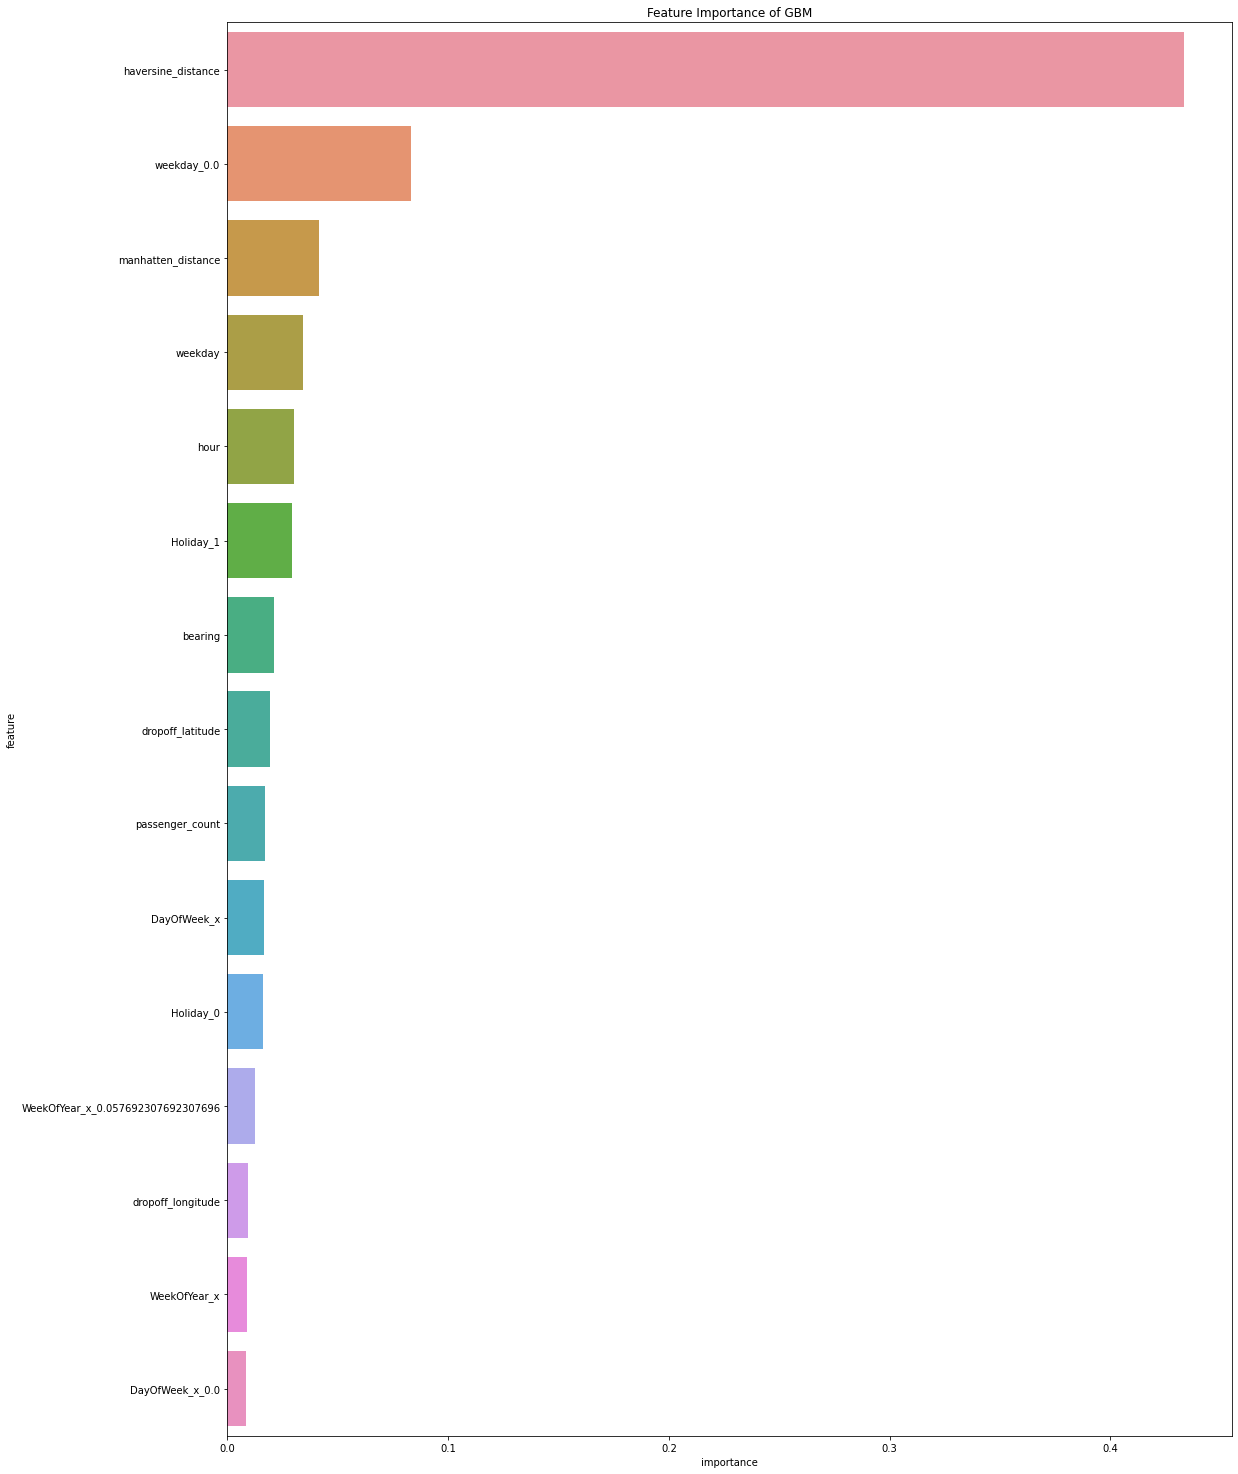

In [197]:
plt.figure(figsize = (18,26))
plt.title('Feature Importance of GBM')

sns.barplot(data=importance_xgb_df.head(15), x='importance', y='feature');

In [203]:

# final predictions(have to retransform log transformed data back to original)

preds_dt = final_dt_model.predict(test_inputs)
preds_dt = np.exp(preds_dt) - 1

preds_xgb = final_xgb_model.predict(test_inputs)
preds_xgb = np.exp(preds_xgb) - 1


In [204]:
submission1_df = submission_df.copy()

submission1_df["trip_duration"] = preds_dt
submission1_df.set_index("id",inplace = True)

submission1_df

,trip_duration
id,
id3004672,808.955424
id3505355,711.687136
id1217141,479.380330
id2150126,1173.694575
id1598245,287.895258
...,...
id3008929,239.300353
id3700764,1129.844255
id2568735,1219.149256


In [205]:
submission2_df = submission_df.copy()

submission2_df["trip_duration"] = preds_xgb
submission2_df.set_index("id",inplace = True)

submission2_df

,trip_duration
id,
id3004672,962.861267
id3505355,773.745361
id1217141,472.825714
id2150126,1020.589783
id1598245,374.963623
...,...
id3008929,260.383728
id3700764,1306.594971
id2568735,1594.066162


In [206]:
submission1_df.to_csv("/kaggle/working/submissions1.csv")
submission2_df.to_csv("/kaggle/working/submissions2.csv")

In [210]:
import pickle

pickle.dump(final_dt_model, open('dt_model_NYC_Taxi_Trip_Duration.pkl', 'wb'))
pickle.dump(final_xgb_model, open('xgb_model_NYC_Taxi_Trip_Duration.pkl', 'wb'))

## Conclusion

In this notebook, I went through the typical Machine Learning steps of Gathering Data, Data Preprocessing & Cleaning, Feature Engineering, etc. which lead to the creation of 2 models that both predict the trip duration of a taxi ride in NYC based upon the features I came up earlier on. The models were also tuned for their hyperparameters which lead to robust models. The tuning of hyperparameters were done by plotting the Training and Validation error graphs to notice at what point the models were overfitting or underfitting the dataset.

The scores of my models are as follows:
>- XGBoost -> **Private Score : 0.40905 & Public Score :0.41414**
>- Decision Tree -> **Private Score : 0.43897 & Public Score :0.44374**

## References

All the necessary References and links of notebooks and code snippets that I have used throughout my own notebook have been provided in the relevant sections of the notebook itself through the help of comments and markdowns. 

Datasets links are as follows:

    NYC Taxi Trip : https://www.kaggle.com/competitions/nyc-taxi-tripduration/data
    NYC 2016 Holiday list : https://www.kaggle.com/datasets/pceccon/nyc2016holidays
    NYC 2016 Hourly Weather Data :https://www.kaggle.com/datasets/meinertsen/new-york-city-taxi-trip-hourly-weather-data

## Future Scope

Additional Datasets could have been implemented into the overall dataset. Such Datsets include the actual on land distance through GPS tracking , Traffic information of the streets of NYC for the typical day, Distribution of stop signs, etc. to make the model even better than it is currently capabale of. There used to be an "OSRM" Dataset which used to provide alot of the mentioned  data and was used by almost all during the actual competition time period, however it has seen been removed for being a private datasource. The top scorers have all used this for their models.

The model hyperparameters can also be more fine tuned. This is something I avoided due to the extreme time consuming nature of it.